# libraries

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import torch.utils.data as data
import numpy as np
import pandas as pd
from torch.utils.data import DataLoader, TensorDataset, random_split
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load and preprocess data:

In [2]:
df = pd.read_csv('SEPT29-OCT2.csv') #one week data
df

,datetime,reference_pm_after,pm_1_1,pm_1_2,pm_1_3,pm_2_1,pm_2_2,pm_2_3,pm_3_1,pm_3_2,pm_3_3,temperature,humidity,O3,CO,NO2,SO2,wind_direction,wind_speed
0,20241001050058,13,3,3,30,3,6,4,3,3,42,17.0,93.6,0.042,0.0,0.0,0.000,135.00,1.13
1,20241001045954,13,4,3,24,4,7,4,3,3,13,17.0,93.7,0.042,0.0,0.0,0.004,135.00,1.15
2,20241001045849,13,4,3,24,6,9,4,1,1,13,17.0,93.7,0.043,0.0,0.0,0.001,89.29,1.11
3,20241001045745,13,6,3,27,1,7,4,3,1,37,17.0,93.7,0.044,0.0,0.0,0.000,135.00,1.13
4,20241001045641,13,6,3,28,4,7,6,3,1,37,17.0,93.7,0.044,0.0,0.0,0.001,135.00,1.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4282,20241002182955,14,3,3,3,4,6,3,1,3,36,15.3,51.8,0.000,0.0,0.0,0.026,220.04,2.25
4283,20241002182845,15,4,3,3,3,6,3,3,3,36,15.3,51.2,0.000,0.0,0.0,0.027,217.50,1.74
4284,20241002182740,16,3,3,1,3,4,3,3,3,45,15.3,51.6,0.000,0.0,0.0,0.026,202.50,1.65
4285,20241002182636,15,3,3,3,4,4,3,1,4,48,15.3,51.9,0.000,0.0,0.0,0.028,244.64,2.49


In [3]:
df.head()

,datetime,reference_pm_after,pm_1_1,pm_1_2,pm_1_3,pm_2_1,pm_2_2,pm_2_3,pm_3_1,pm_3_2,pm_3_3,temperature,humidity,O3,CO,NO2,SO2,wind_direction,wind_speed
0,20241001050058,13,3,3,30,3,6,4,3,3,42,17.0,93.6,0.042,0.0,0.0,0.000,135.00,1.13
1,20241001045954,13,4,3,24,4,7,4,3,3,13,17.0,93.7,0.042,0.0,0.0,0.004,135.00,1.15
2,20241001045849,13,4,3,24,6,9,4,1,1,13,17.0,93.7,0.043,0.0,0.0,0.001,89.29,1.11
3,20241001045745,13,6,3,27,1,7,4,3,1,37,17.0,93.7,0.044,0.0,0.0,0.000,135.00,1.13
4,20241001045641,13,6,3,28,4,7,6,3,1,37,17.0,93.7,0.044,0.0,0.0,0.001,135.00,1.11


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4287 entries, 0 to 4286
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   datetime            4287 non-null   int64  
 1   reference_pm_after  4287 non-null   int64  
 2   pm_1_1              4287 non-null   int64  
 3   pm_1_2              4287 non-null   int64  
 4   pm_1_3              4287 non-null   int64  
 5   pm_2_1              4287 non-null   int64  
 6   pm_2_2              4287 non-null   int64  
 7   pm_2_3              4287 non-null   int64  
 8   pm_3_1              4287 non-null   int64  
 9   pm_3_2              4287 non-null   int64  
 10  pm_3_3              4287 non-null   int64  
 11  temperature         4287 non-null   float64
 12  humidity            4287 non-null   float64
 13  O3                  4287 non-null   float64
 14  CO                  4287 non-null   float64
 15  NO2                 4287 non-null   float64
 16  SO2   

In [5]:
df.isnull().sum()

datetime              0
reference_pm_after    0
pm_1_1                0
pm_1_2                0
pm_1_3                0
pm_2_1                0
pm_2_2                0
pm_2_3                0
pm_3_1                0
pm_3_2                0
pm_3_3                0
temperature           0
humidity              0
O3                    0
CO                    0
NO2                   0
SO2                   0
wind_direction        3
wind_speed            0
dtype: int64

# Handling mising values

In [6]:
# Interpolation method
df_filled_interpolated = df.interpolate(method='linear')
# # Drop rows with any missing values
# df_dropped = df.dropna()

In [7]:

df_filled_interpolated

,datetime,reference_pm_after,pm_1_1,pm_1_2,pm_1_3,pm_2_1,pm_2_2,pm_2_3,pm_3_1,pm_3_2,pm_3_3,temperature,humidity,O3,CO,NO2,SO2,wind_direction,wind_speed
0,20241001050058,13,3,3,30,3,6,4,3,3,42,17.0,93.6,0.042,0.0,0.0,0.000,135.00,1.13
1,20241001045954,13,4,3,24,4,7,4,3,3,13,17.0,93.7,0.042,0.0,0.0,0.004,135.00,1.15
2,20241001045849,13,4,3,24,6,9,4,1,1,13,17.0,93.7,0.043,0.0,0.0,0.001,89.29,1.11
3,20241001045745,13,6,3,27,1,7,4,3,1,37,17.0,93.7,0.044,0.0,0.0,0.000,135.00,1.13
4,20241001045641,13,6,3,28,4,7,6,3,1,37,17.0,93.7,0.044,0.0,0.0,0.001,135.00,1.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4282,20241002182955,14,3,3,3,4,6,3,1,3,36,15.3,51.8,0.000,0.0,0.0,0.026,220.04,2.25
4283,20241002182845,15,4,3,3,3,6,3,3,3,36,15.3,51.2,0.000,0.0,0.0,0.027,217.50,1.74
4284,20241002182740,16,3,3,1,3,4,3,3,3,45,15.3,51.6,0.000,0.0,0.0,0.026,202.50,1.65
4285,20241002182636,15,3,3,3,4,4,3,1,4,48,15.3,51.9,0.000,0.0,0.0,0.028,244.64,2.49


In [8]:
df_filled_interpolated.isnull().sum()

datetime              0
reference_pm_after    0
pm_1_1                0
pm_1_2                0
pm_1_3                0
pm_2_1                0
pm_2_2                0
pm_2_3                0
pm_3_1                0
pm_3_2                0
pm_3_3                0
temperature           0
humidity              0
O3                    0
CO                    0
NO2                   0
SO2                   0
wind_direction        0
wind_speed            0
dtype: int64

In [9]:
# # df1 = df.drop(labels=['pm_1_1', 'pm_1_2', 'pm_1_3', 'pm_2_1', 'pm_2_2', 'pm_2_3', 'pm_3_1', 'pm_3_2', 'pm_3_3', 'temperature', 'humidity', 'NO2', 'O3', 'CO','SO2', 'wind_direction', 'wind_speed'], axis=1)
# df1 = df.drop(labels=['NO2', 'O3', 'CO','SO2','temperature', 'humidity','wind_direction', 'wind_speed'], axis=1)

In [10]:
# Convert datetime column
df['datetime'] = pd.to_datetime(df_filled_interpolated['datetime'], format='%Y%m%d%H%M%S', errors='coerce')
df1 = df.sort_values(by='datetime').reset_index(drop=True)

In [11]:
df1.head()
# df.tail()


,datetime,reference_pm_after,pm_1_1,pm_1_2,pm_1_3,pm_2_1,pm_2_2,pm_2_3,pm_3_1,pm_3_2,pm_3_3,temperature,humidity,O3,CO,NO2,SO2,wind_direction,wind_speed
0,2024-09-26 01:18:19,20,15,9,15,13,15,15,10,48,13,21.5,87.3,0.054,0.651,0.0,0.008,88.95,11.60
1,2024-09-26 01:19:23,20,10,10,12,12,16,13,3,48,4,21.5,87.5,0.054,0.000,0.0,0.010,225.00,11.31
2,2024-09-26 01:20:27,20,10,10,10,12,16,9,3,51,6,21.5,88.0,0.054,0.000,0.0,0.005,225.00,15.50
3,2024-09-26 01:21:13,4,12,12,12,12,16,10,4,54,6,21.5,88.1,0.052,0.006,0.0,0.010,225.00,16.29
4,2024-09-26 01:21:32,20,12,10,12,12,18,6,4,54,6,21.4,88.0,0.051,0.000,0.0,0.012,225.00,16.20


In [12]:
print(df_filled_interpolated.isnull().values.any())

False


In [13]:
print(df_filled_interpolated.isnull().sum().sum())

0


# Data visualization

Plot for reference_pm_after saved to D:/PLOTS/SENSORS/reference_pm_after_distribution_plot.png
Plot for pm_1_1 saved to D:/PLOTS/SENSORS/pm_1_1_distribution_plot.png
Plot for pm_1_2 saved to D:/PLOTS/SENSORS/pm_1_2_distribution_plot.png
Plot for pm_1_3 saved to D:/PLOTS/SENSORS/pm_1_3_distribution_plot.png
Plot for pm_2_1 saved to D:/PLOTS/SENSORS/pm_2_1_distribution_plot.png
Plot for pm_2_2 saved to D:/PLOTS/SENSORS/pm_2_2_distribution_plot.png
Plot for pm_2_3 saved to D:/PLOTS/SENSORS/pm_2_3_distribution_plot.png
Plot for pm_3_1 saved to D:/PLOTS/SENSORS/pm_3_1_distribution_plot.png
Plot for pm_3_2 saved to D:/PLOTS/SENSORS/pm_3_2_distribution_plot.png
Plot for pm_3_3 saved to D:/PLOTS/SENSORS/pm_3_3_distribution_plot.png


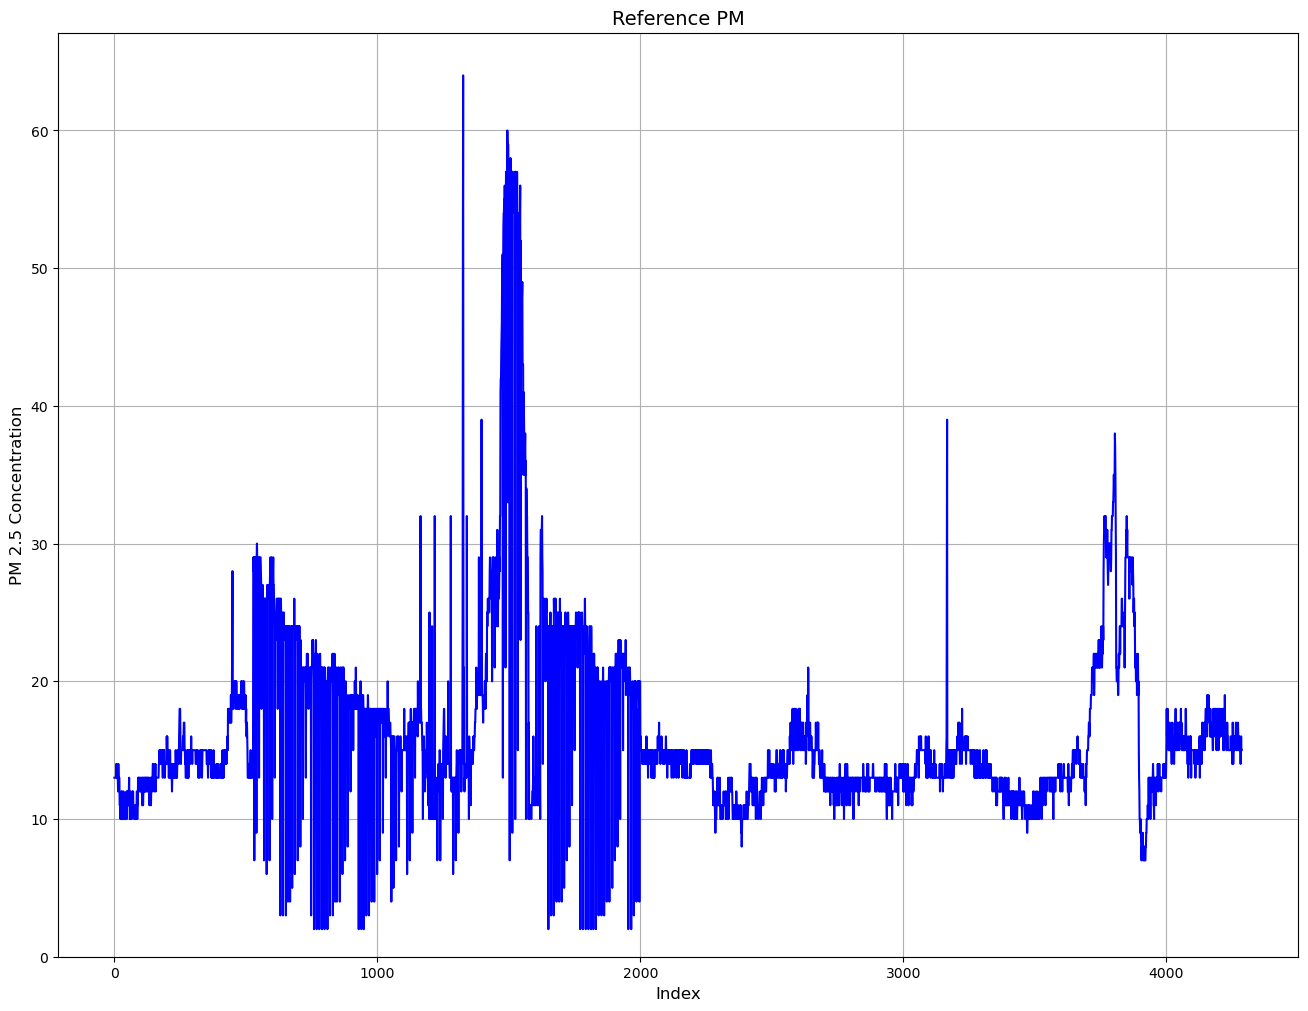

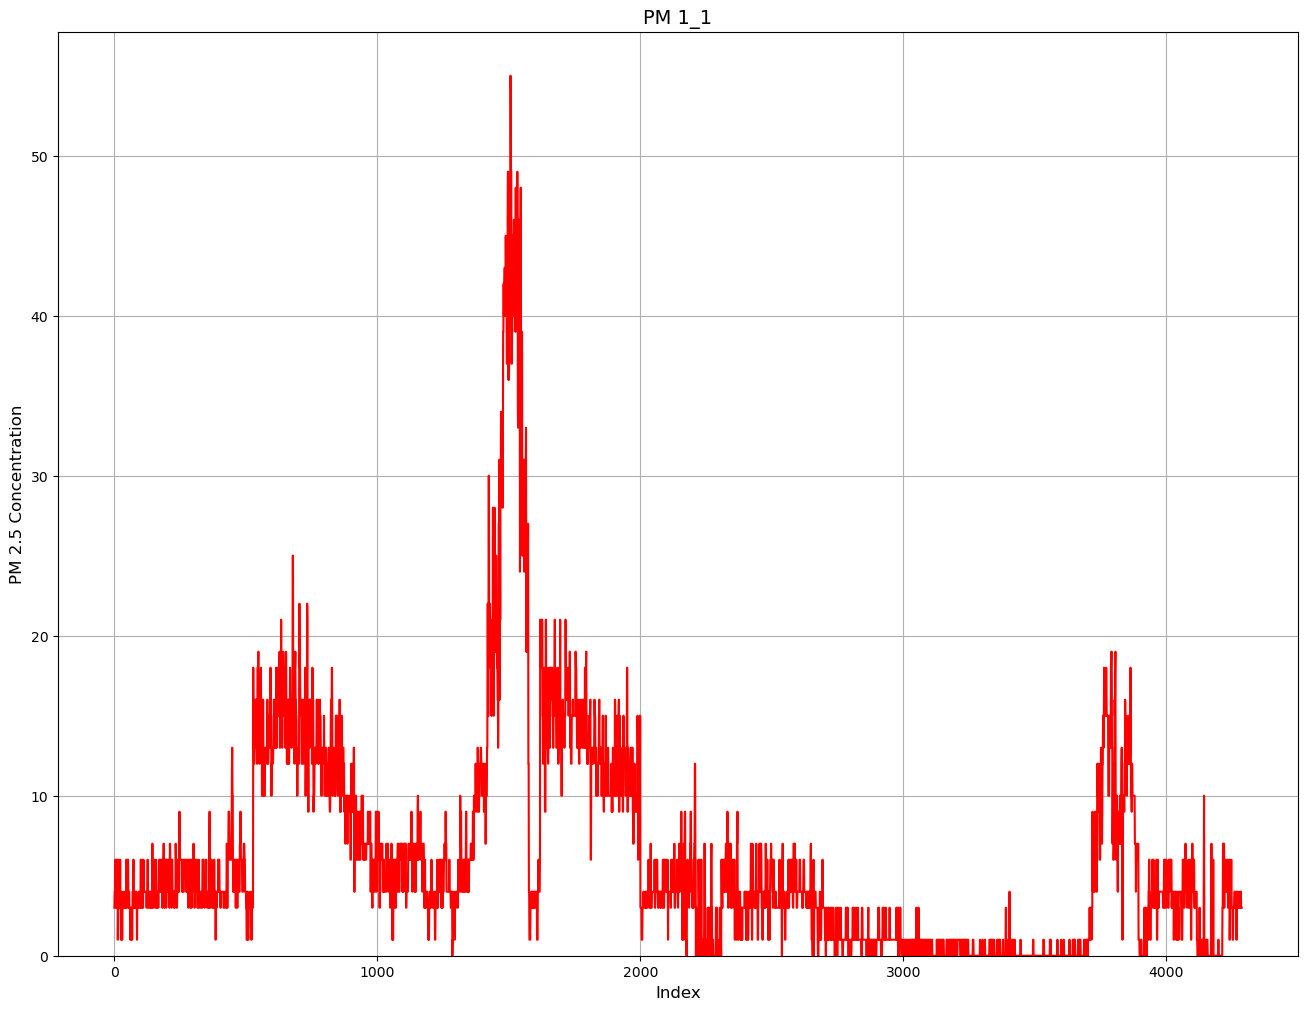

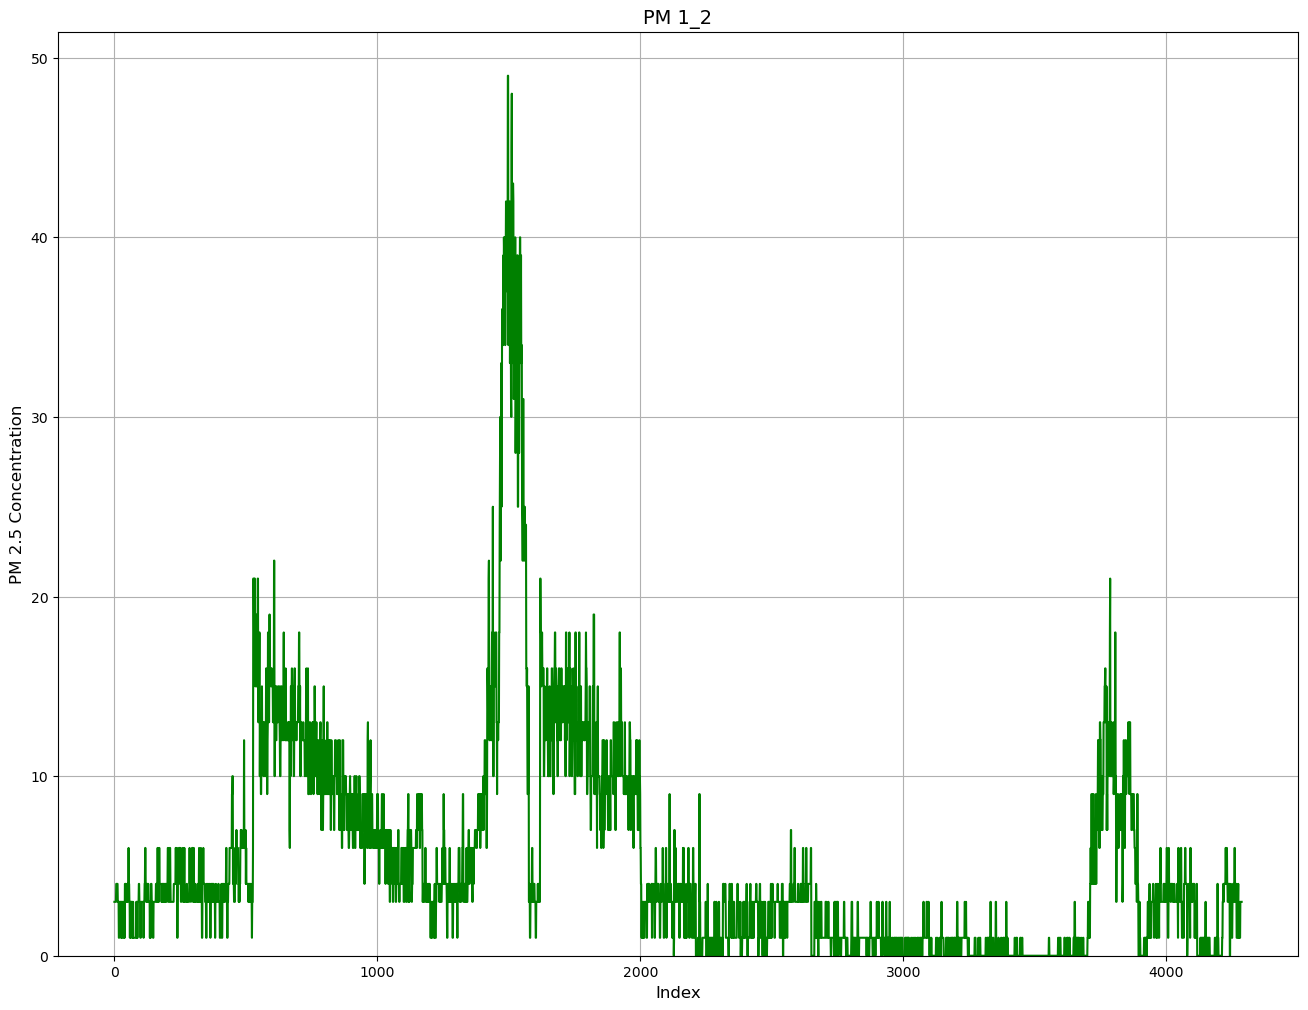

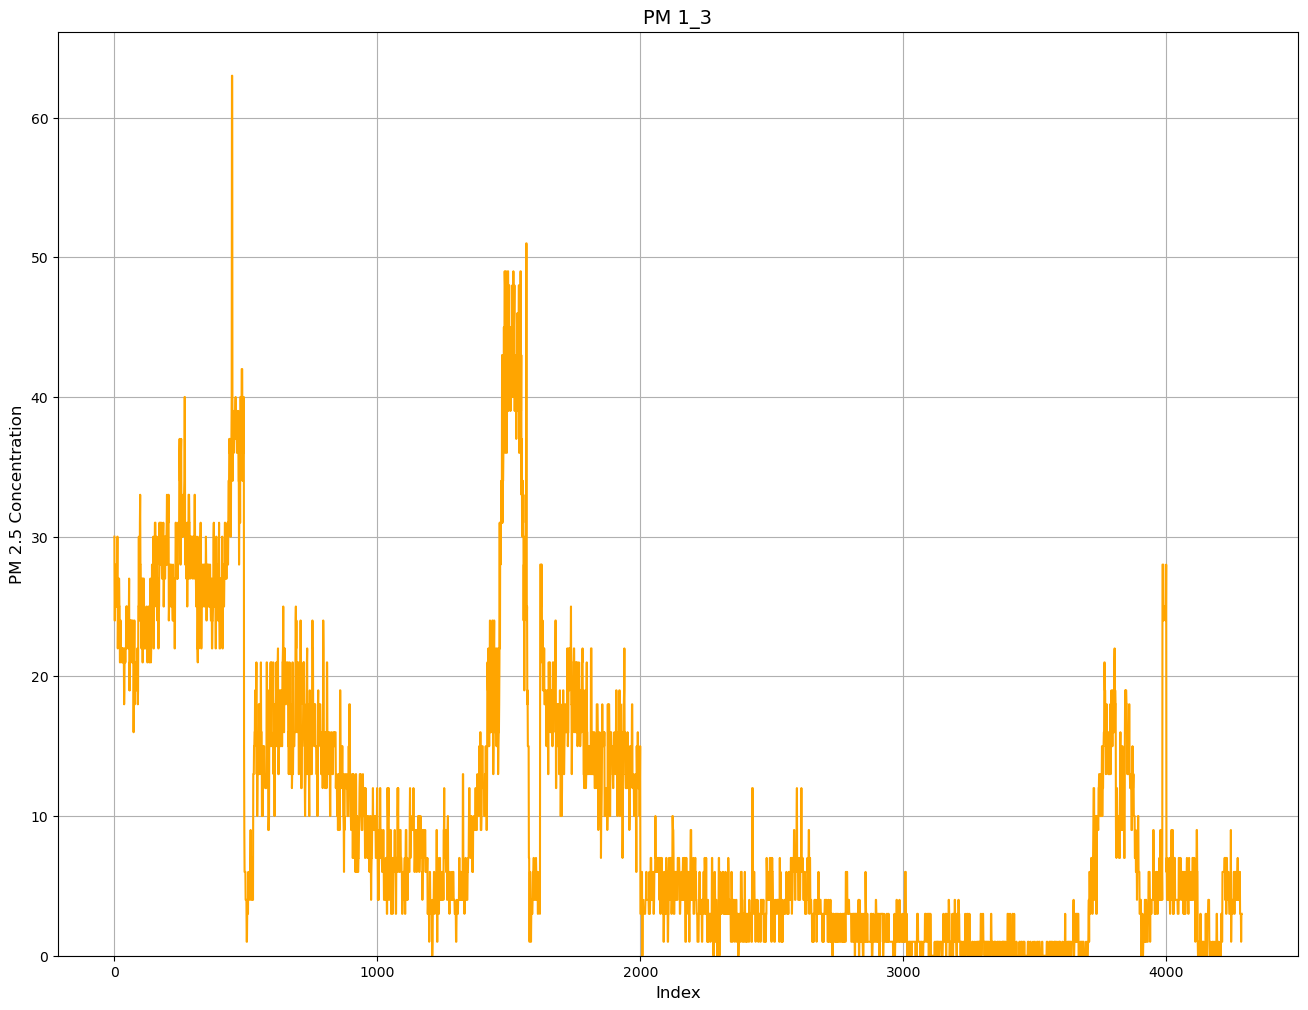

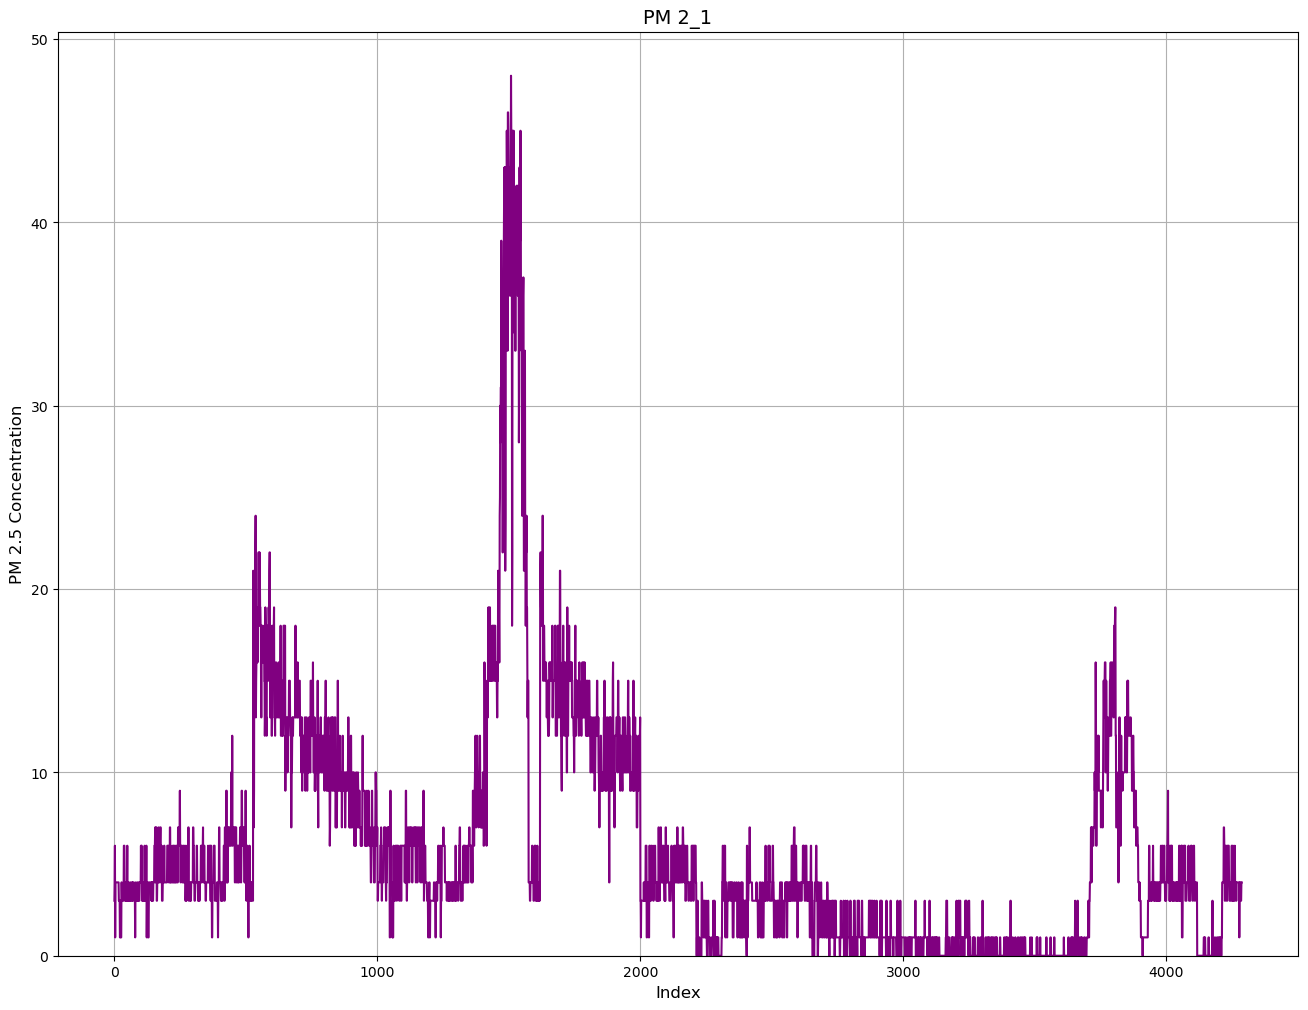

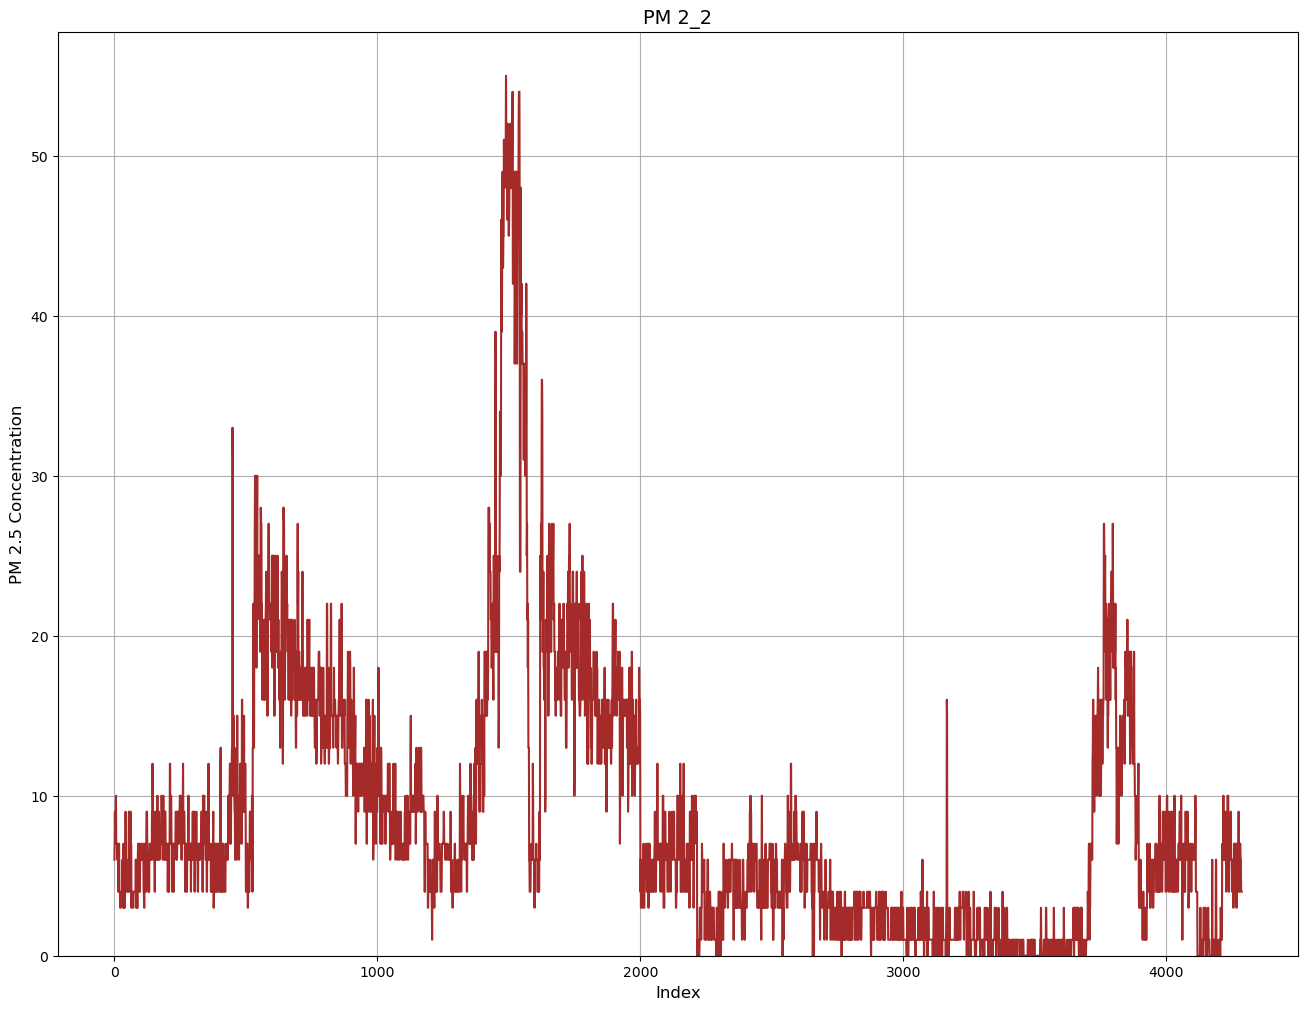

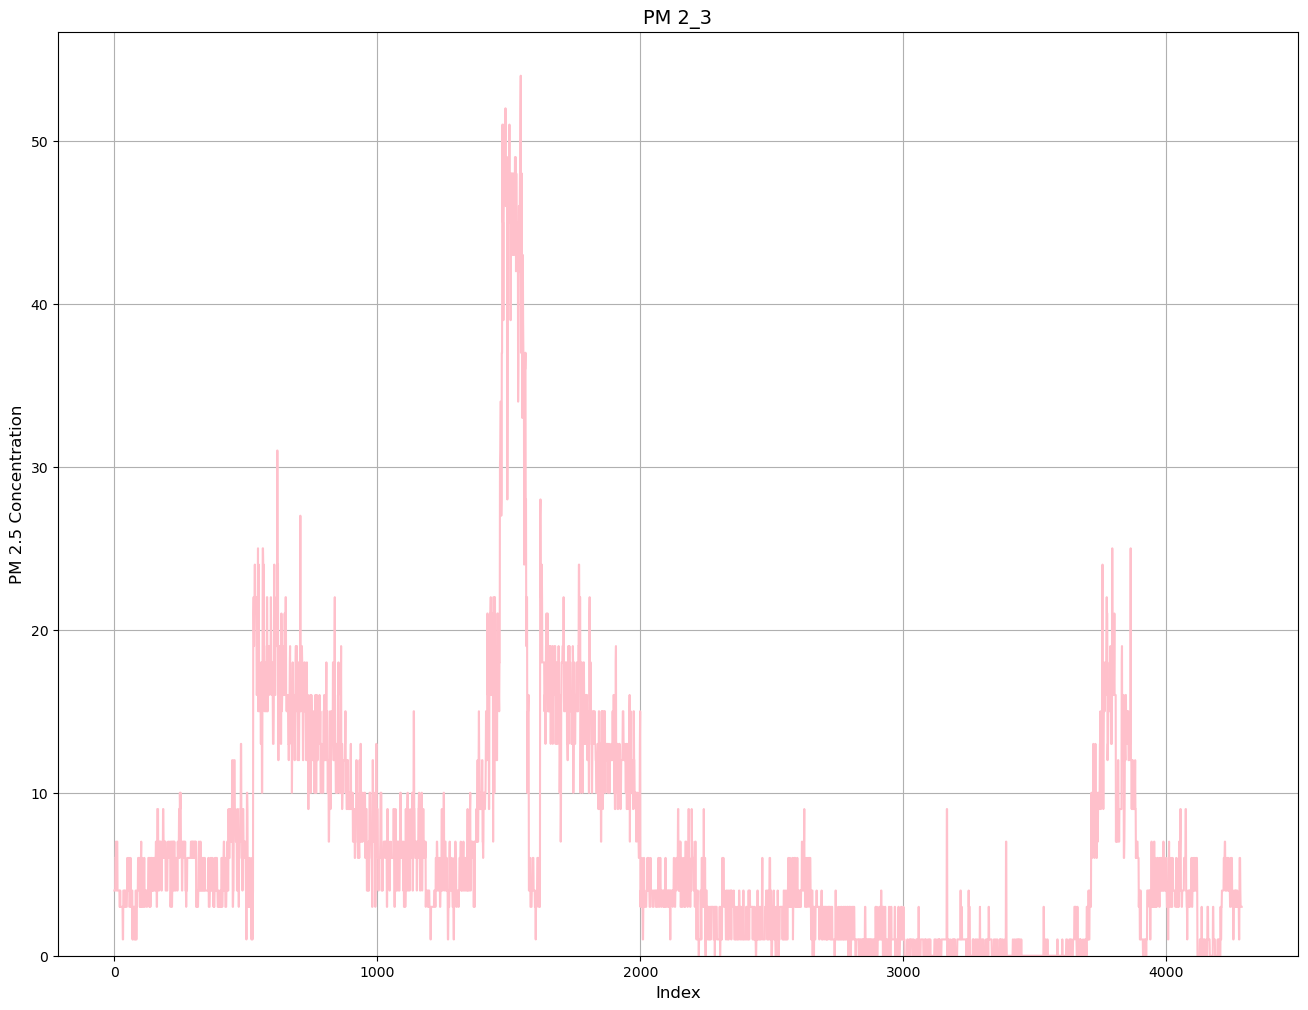

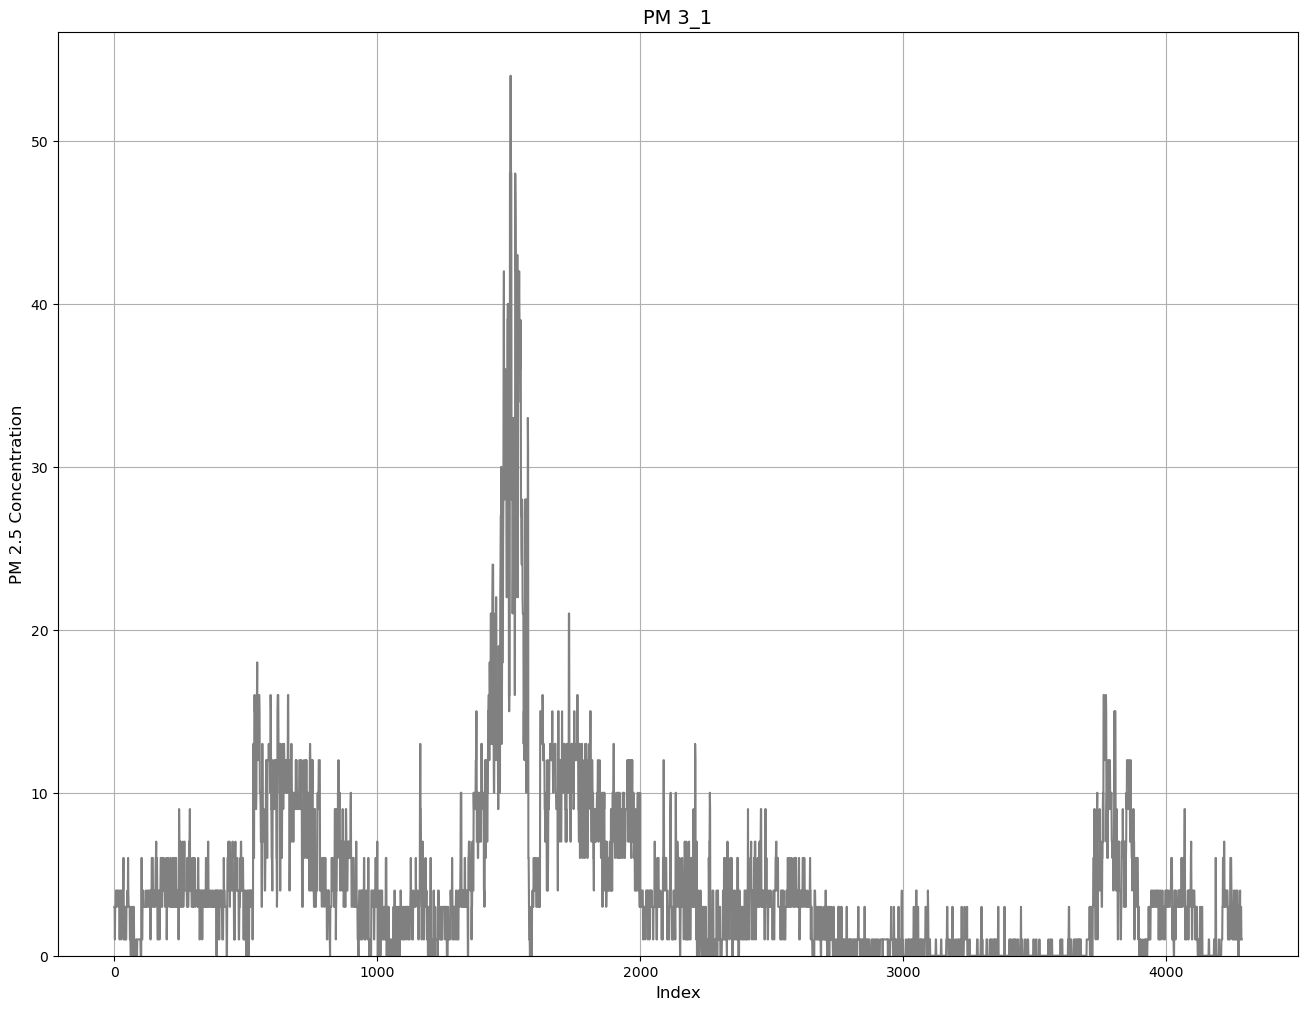

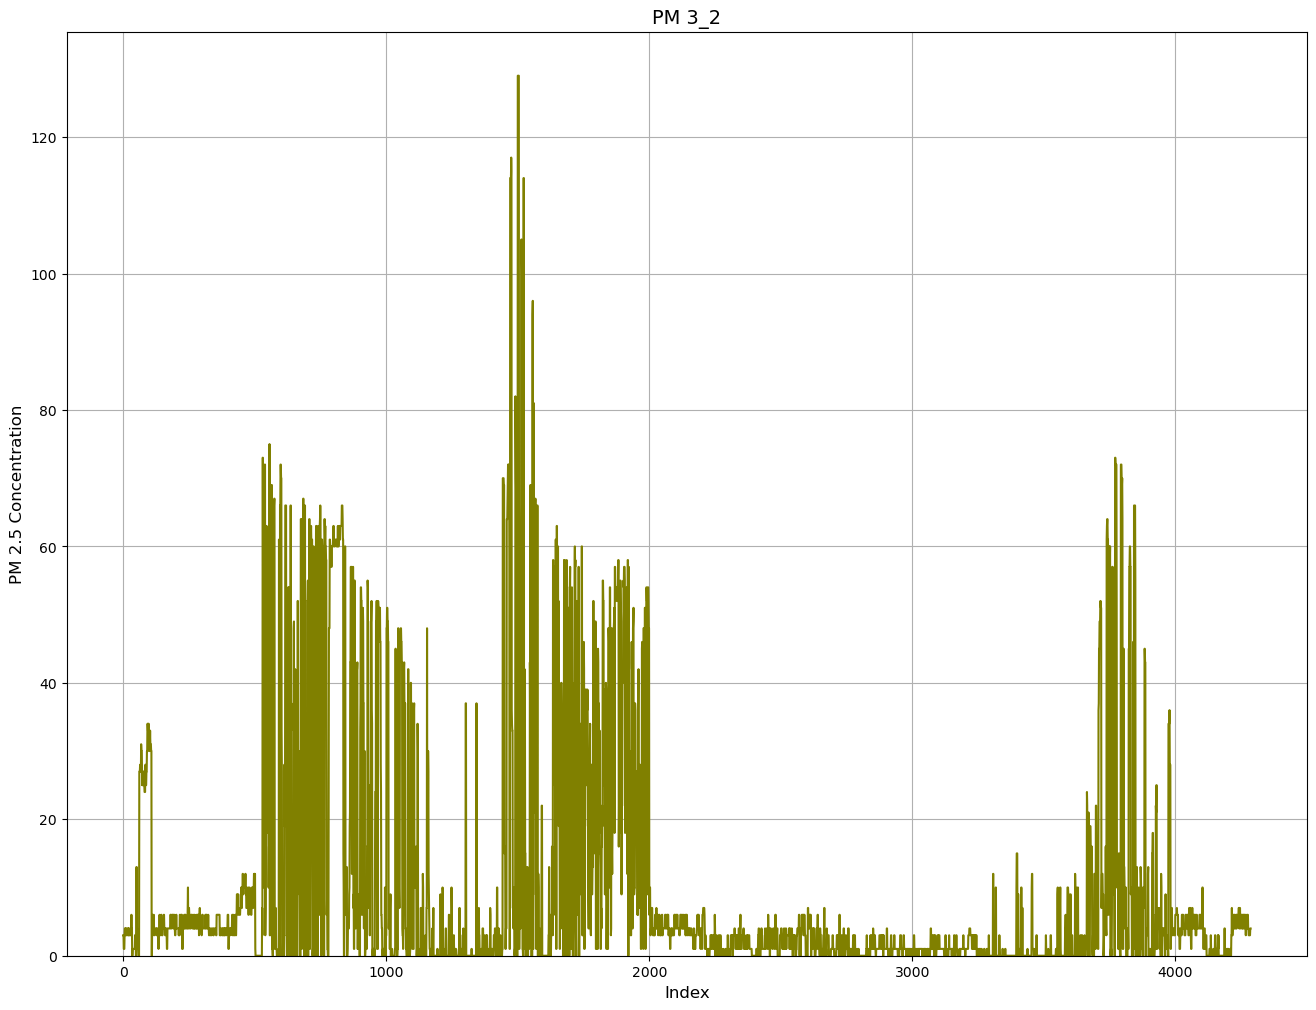

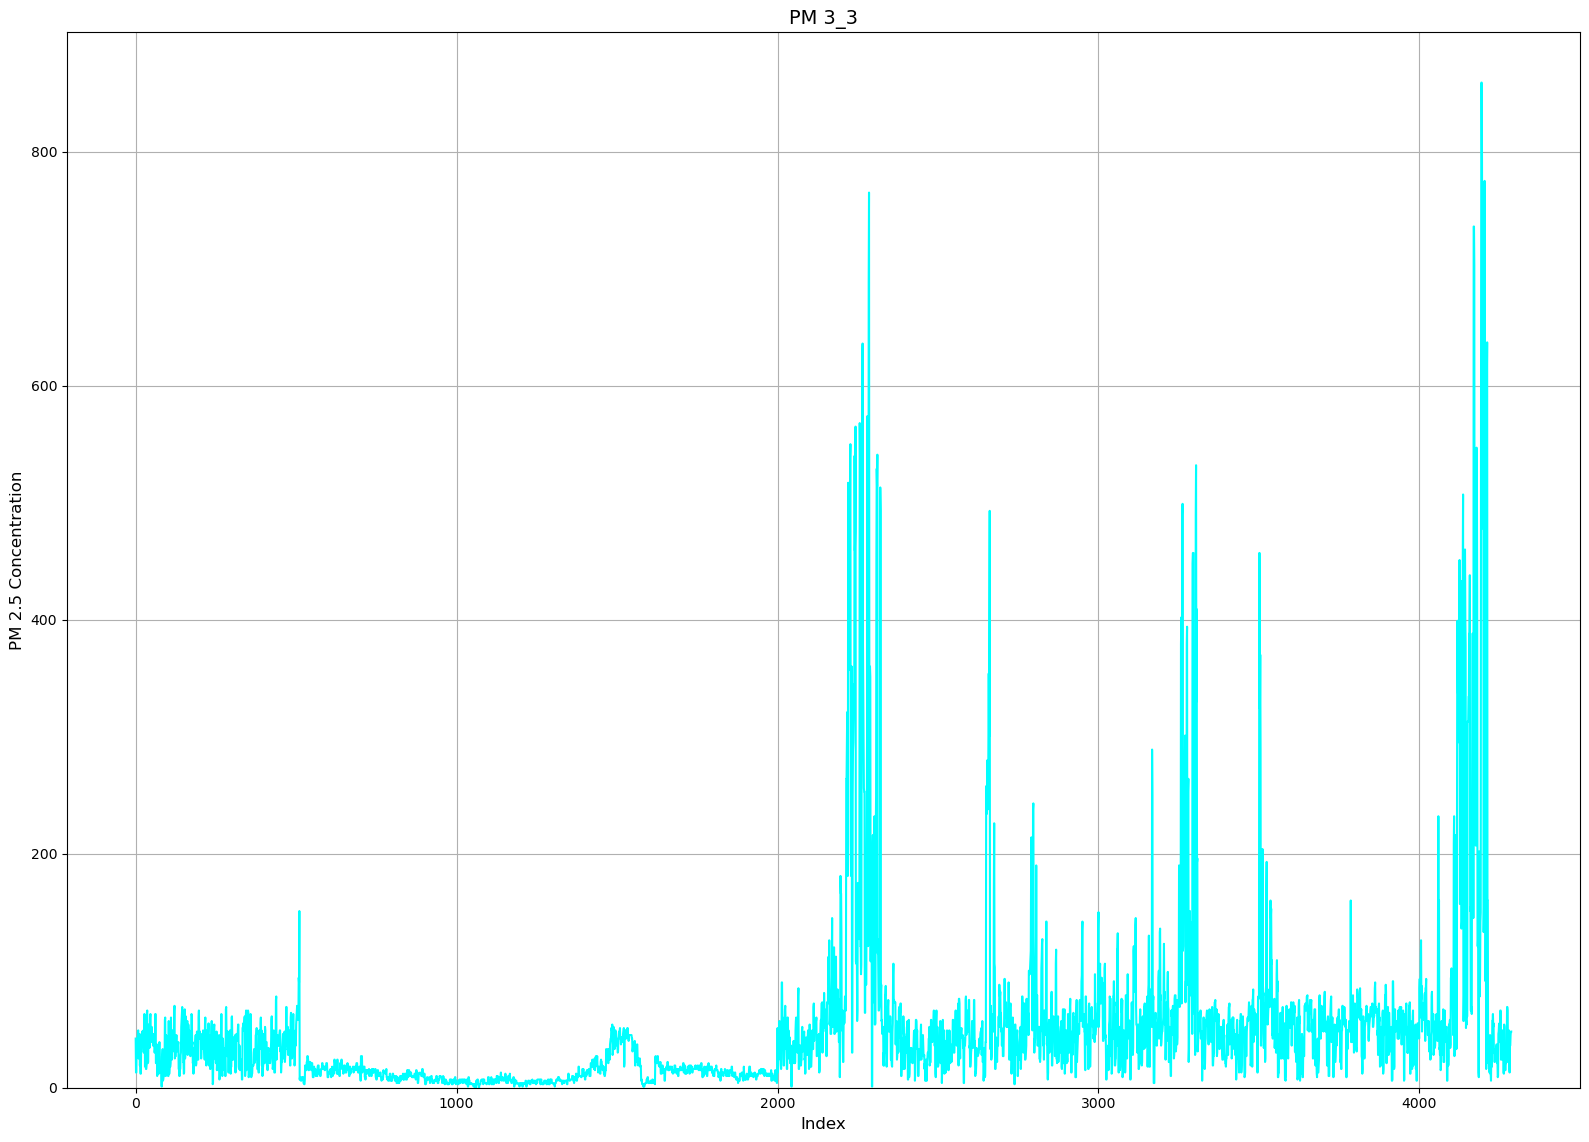

In [14]:

import matplotlib.pyplot as plt

# Define the directory where plots will be saved
output_directory = 'D:/PLOTS/SENSORS/'

# List of sensor column names (including reference sensor)
sensors_to_plot = ['reference_pm_after', 'pm_1_1', 'pm_1_2', 'pm_1_3', 'pm_2_1', 'pm_2_2', 'pm_2_3', 'pm_3_1', 'pm_3_2', 'pm_3_3']
titles = ['Reference PM', 'PM 1_1', 'PM 1_2', 'PM 1_3', 'PM 2_1', 'PM 2_2', 'PM 2_3', 'PM 3_1', 'PM 3_2', 'PM 3_3']

# Assign colors to each plot
colors = ['blue', 'red', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']

# Number of points to plot (e.g., 1500)
num_points = 5000

# Slice the DataFrame to limit the number of points
df_limited = df.iloc[:num_points]  # This limits the data to the first 1500 rows

# Loop through each sensor and plot individually
for i, (title, col_name) in enumerate(zip(titles, sensors_to_plot)):
    # Create a new figure for each plot
    plt.figure(figsize=(16, 12))
    plt.plot(df_limited.index, df_limited[col_name], color=colors[i], linestyle='-')
    plt.title(title, fontsize=14)
    plt.xlabel('Index', fontsize=12)
    plt.ylabel('PM 2.5 Concentration', fontsize=12)
    plt.ylim(bottom=0)
    plt.grid(True)
    
    # Save the plot to the output directory for each sensor
    plot_filename = f"{output_directory}{col_name}_distribution_plot.png"
    plt.savefig(plot_filename)
    print(f"Plot for {col_name} saved to {plot_filename}")
    
    # Close the plot to free up memory
#     plt.close()


# Adjust layout to avoid overlap
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Close the plot to avoid displaying it
# plt.close()
plt.show()


In [15]:
# df.dtypes

Plot for Group 1 saved to D:/PLOTS/GROUPED SENSORS/Group_1_sensors_plot.png


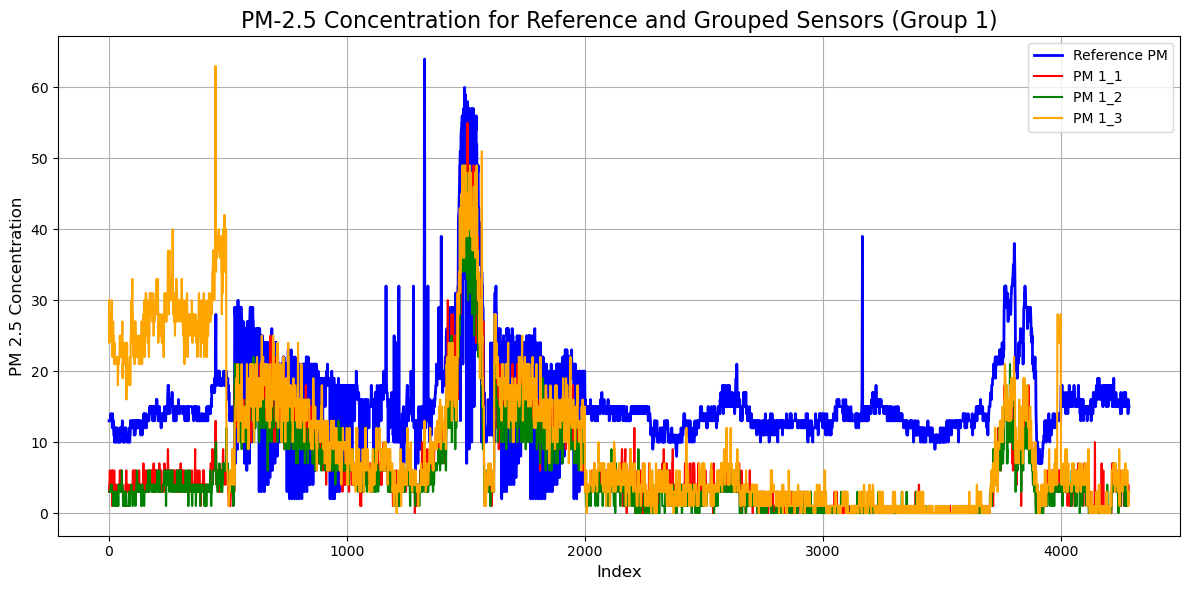

Plot for Group 2 saved to D:/PLOTS/GROUPED SENSORS/Group_2_sensors_plot.png


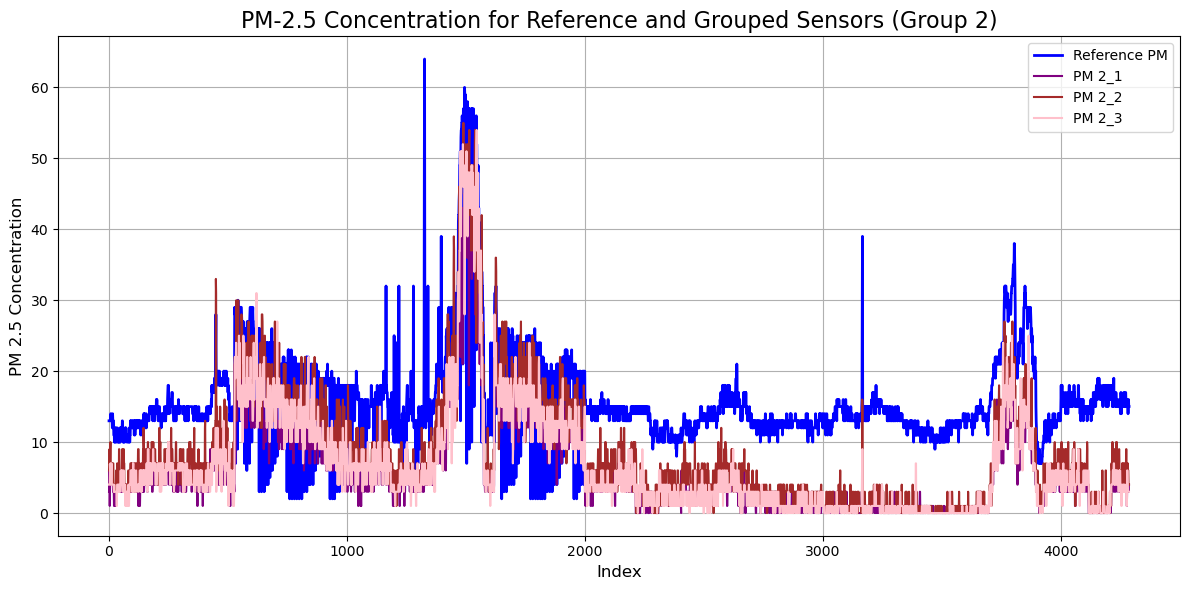

Plot for Group 3 saved to D:/PLOTS/GROUPED SENSORS/Group_3_sensors_plot.png


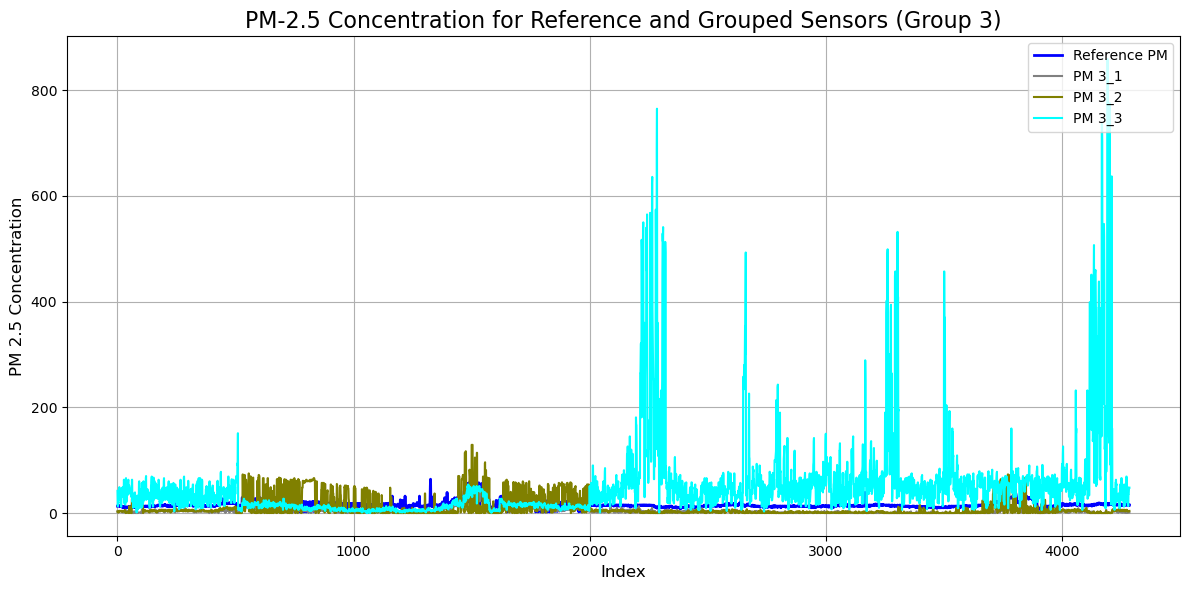

In [16]:

import matplotlib.pyplot as plt

# Define the directory where plots will be saved
output_directory = 'D:/PLOTS/GROUPED SENSORS/'

# List of sensor column names (including reference sensor)
sensors_to_plot = ['reference_pm_after', 'pm_1_1', 'pm_1_2', 'pm_1_3', 'pm_2_1', 'pm_2_2', 'pm_2_3', 'pm_3_1', 'pm_3_2', 'pm_3_3']
titles = ['Reference PM', 'PM 1_1', 'PM 1_2', 'PM 1_3', 'PM 2_1', 'PM 2_2', 'PM 2_3', 'PM 3_1', 'PM 3_2', 'PM 3_3']

# Assign colors to each plot
colors = ['blue', 'red', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']

# Number of points to plot (e.g., 1500)
num_points = 5000

# Slice the DataFrame to limit the number of points
df_limited = df.iloc[:num_points]  # This limits the data to the first 1500 rows

# Grouping the sensors in sets of 3 along with the reference sensor
for group_number, group_start in enumerate(range(1, len(sensors_to_plot), 3)):
    plt.figure(figsize=(12, 6))
    
    # Plot the reference sensor
    plt.plot(df_limited.index, df_limited['reference_pm_after'], label='Reference PM', color='blue', linewidth=2)
    
    # Plot 3 other sensors in the group
    for i in range(group_start, group_start + 3):
        if i < len(sensors_to_plot):
            plt.plot(df_limited.index, df_limited[sensors_to_plot[i]], label=titles[i], color=colors[i])
    
    # Add labels and title
    plt.title(f'PM-2.5 Concentration for Reference and Grouped Sensors (Group {group_number + 1})', fontsize=16)
    plt.xlabel('Index', fontsize=12)
    plt.ylabel('PM 2.5 Concentration', fontsize=12)
    
    # Add grid and legend
    plt.grid(True)
    plt.legend(loc='upper right')  # Show the legend in the top right corner
    
    # Save the plot to the output directory
    plot_filename = f"{output_directory}Group_{group_number + 1}_sensors_plot.png"
    plt.savefig(plot_filename)
#     plt.close()  # Close the plot to free memory
    
    print(f"Plot for Group {group_number + 1} saved to {plot_filename}")

#  Show the plot
    plt.tight_layout()
    plt.show()







# METEOLOGICAL VISUALLIZATION

Plot for temperature saved as D:/PLOTS/SENSORS/temperature_distribution_plot.png and D:/PLOTS/SENSORS/temperature_distribution_plot.pdf
Plot for humidity saved as D:/PLOTS/SENSORS/humidity_distribution_plot.png and D:/PLOTS/SENSORS/humidity_distribution_plot.pdf
Plot for O3 saved as D:/PLOTS/SENSORS/O3_distribution_plot.png and D:/PLOTS/SENSORS/O3_distribution_plot.pdf
Plot for CO saved as D:/PLOTS/SENSORS/CO_distribution_plot.png and D:/PLOTS/SENSORS/CO_distribution_plot.pdf
Plot for NO2 saved as D:/PLOTS/SENSORS/NO2_distribution_plot.png and D:/PLOTS/SENSORS/NO2_distribution_plot.pdf
Plot for SO2 saved as D:/PLOTS/SENSORS/SO2_distribution_plot.png and D:/PLOTS/SENSORS/SO2_distribution_plot.pdf
Plot for wind_direction saved as D:/PLOTS/SENSORS/wind_direction_distribution_plot.png and D:/PLOTS/SENSORS/wind_direction_distribution_plot.pdf
Plot for wind_speed saved as D:/PLOTS/SENSORS/wind_speed_distribution_plot.png and D:/PLOTS/SENSORS/wind_speed_distribution_plot.pdf


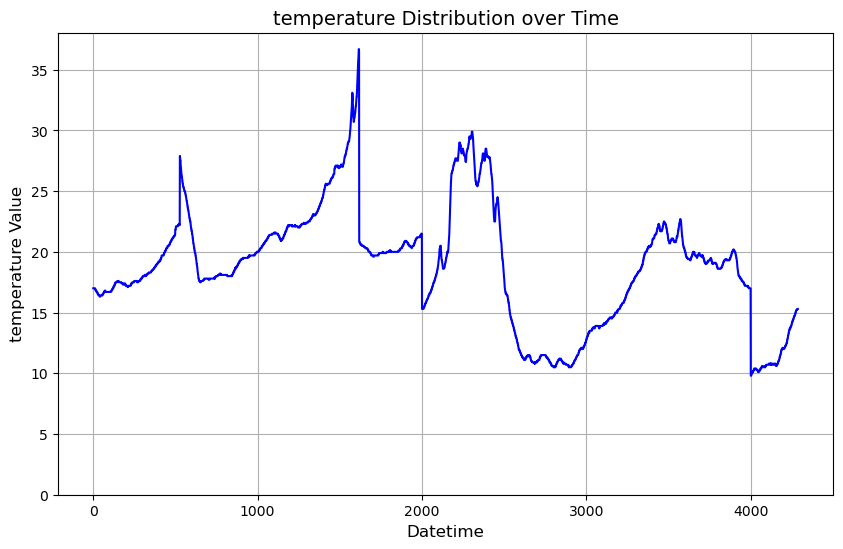

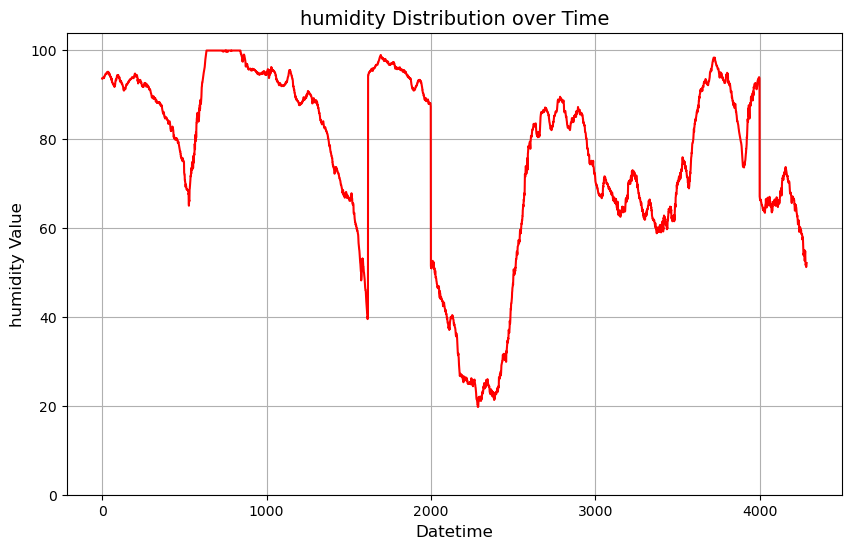

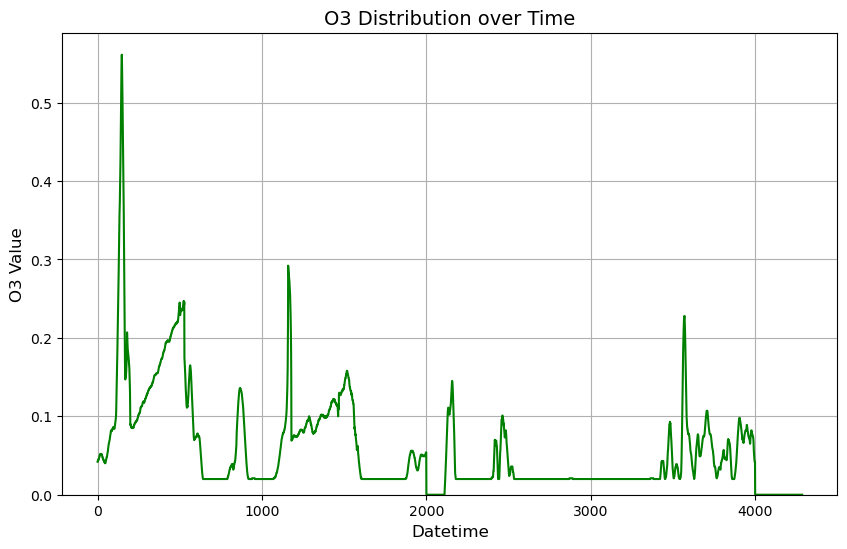

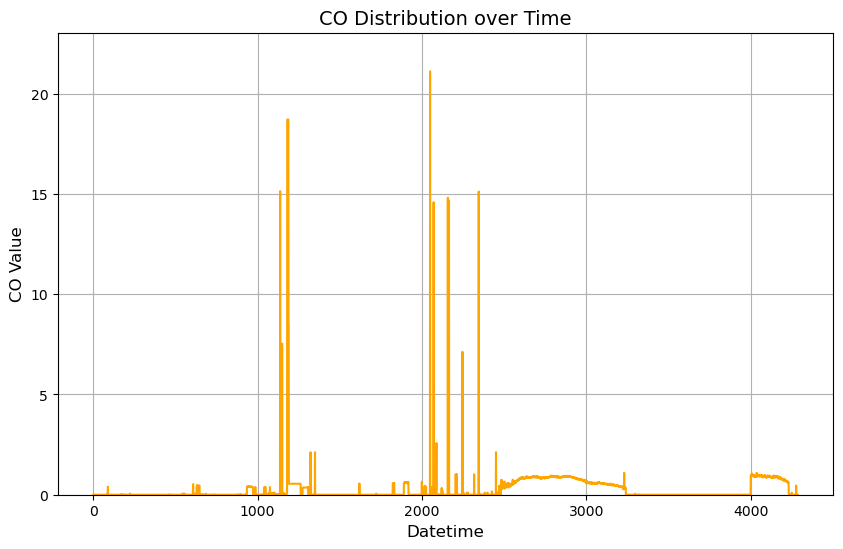

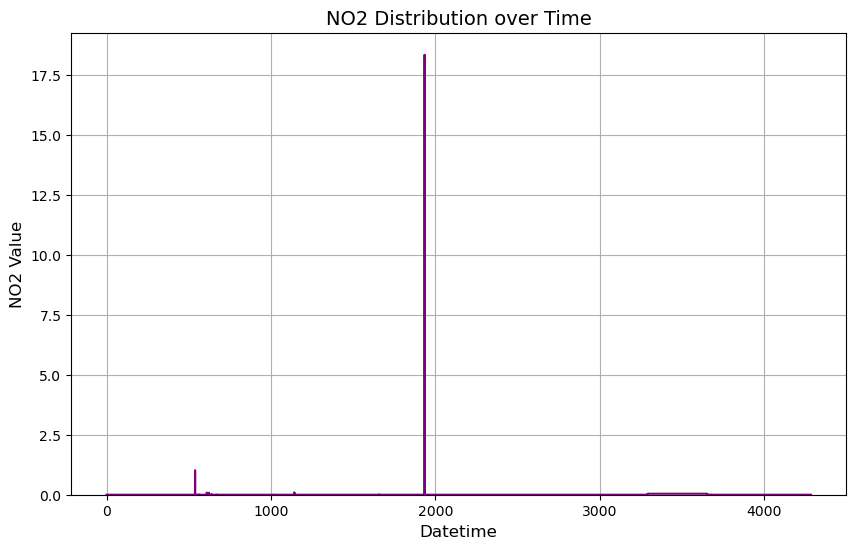

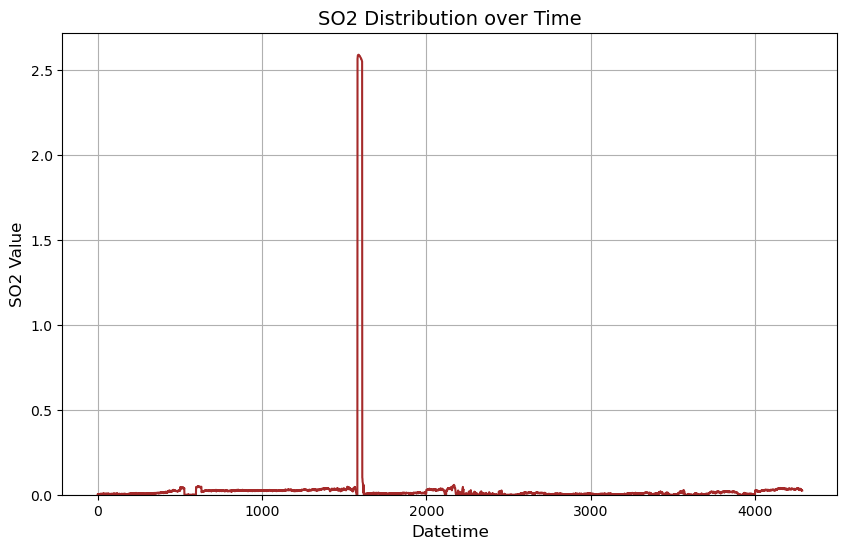

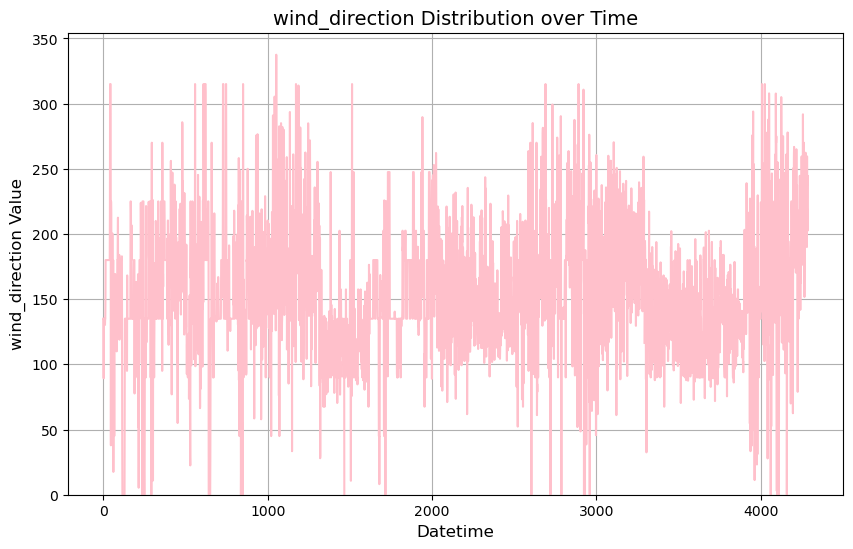

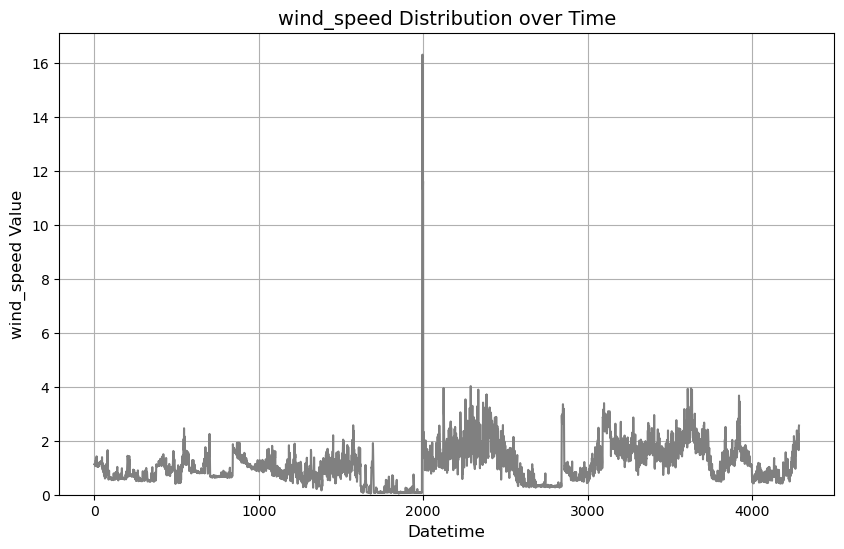

In [17]:
import matplotlib.pyplot as plt
import os

# Define the directory where plots will be saved
output_directory = 'D:/PLOTS/SENSORS/'

# Create directory if it doesn't exist
os.makedirs(output_directory, exist_ok=True)

# List of meteorological sensor column names
sensors_to_plot = ['temperature', 'humidity', 'O3', 'CO', 'NO2', 'SO2', 'wind_direction', 'wind_speed']

# Assign colors to each plot
colors = ['blue', 'red', 'green', 'orange', 'purple', 'brown', 'pink', 'gray']

# Number of points to plot
num_points = 5000

# Slice the DataFrame to limit the number of points
df_limited = df.iloc[:num_points]  # Limits the data to the first num_points rows

# Loop through each sensor and plot individually
for i, col_name in enumerate(sensors_to_plot):
    plt.figure(figsize=(10, 6))  # Adjust figure size for each plot
    plt.plot(df_limited.index, df_limited[col_name], color=colors[i % len(colors)], linestyle='-')
    plt.title(f'{col_name} Distribution over Time', fontsize=14)
    plt.xlabel('Index' if 'datetime' not in df.columns else 'Datetime', fontsize=12)
    plt.ylabel(f'{col_name} Value', fontsize=12)
    plt.ylim(bottom=0)  # Set y-axis minimum to 0
    plt.grid(True)
    
    # Save the plot to the output directory for each sensor
    plot_filename_png = os.path.join(output_directory, f"{col_name}_distribution_plot.png")
    plot_filename_pdf = os.path.join(output_directory, f"{col_name}_distribution_plot.pdf")
    plt.savefig(plot_filename_png)
    plt.savefig(plot_filename_pdf)
    
    print(f"Plot for {col_name} saved as {plot_filename_png} and {plot_filename_pdf}")
    
    # Close the plot to free up memory
#     plt.close()

# No need to use plt.tight_layout() as each figure is plotted separately


# FEATURE SELECTION

# processing wind direction

In [18]:
# Assuming wind_direction is in degrees (0° to 360°)
# df_filled_interpolated
# Add the wind direction to the features
df_filled_interpolated['wind_direction_sin'] = np.sin(np.radians(df_filled_interpolated['wind_direction']))
df_filled_interpolated['wind_direction_cos'] = np.cos(np.radians(df_filled_interpolated['wind_direction']))

In [19]:
# Select features and target
# 'wind_direction'
# features = df[['pm_1_1', 'pm_1_2', 'pm_1_3', 'pm_2_1', 'pm_2_2', 'pm_2_3', 'pm_3_1', 'pm_3_2', 'pm_3_3', 
#                'temperature', 'humidity', 'O3', 'CO', 'NO2', 'SO2', 'wind_speed']]

# Now select features, including the sine and cosine of wind direction
features = df_filled_interpolated[['pm_1_1', 'pm_1_2', 'pm_1_3', 'pm_2_1', 'pm_2_2', 'pm_2_3', 'pm_3_1', 'pm_3_2', 'pm_3_3', 
               'temperature', 'humidity', 'O3', 'CO', 'NO2', 'SO2', 'wind_speed', 
               'wind_direction_sin', 'wind_direction_cos']]
target = df_filled_interpolated['reference_pm_after']

# features = data.drop(columns=['reference_pm_after', 'datetime','wind_direction']).values
# target = data['reference_pm_after'].values

In [20]:
from sklearn.preprocessing import StandardScaler
from torch.utils.data import TensorDataset, DataLoader, random_split

scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features)


# Set sequence length to 60 (1 hour)
sequence_length = 60
X_sequences = []
y_sequences = []

# Create sequences of 1 hour (60 time steps)
for i in range(len(features_scaled) - sequence_length):
    X_sequences.append(features_scaled[i:i + sequence_length])
    y_sequences.append(target.values[i + sequence_length])

# Convert to PyTorch tensors
X_tensor = torch.tensor(X_sequences, dtype=torch.float32)  # Shape: (num_samples, 60, input_size)
y_tensor = torch.tensor(y_sequences, dtype=torch.float32).view(-1, 1)  # Shape: (num_samples, 1)

# Create a TensorDataset
dataset = TensorDataset(X_tensor, y_tensor)

# y_tensor, y_tensor.shape
# X_tensor, X_tensor.shape
# dataset


C:\Users\esnta\AppData\Local\Temp\ipykernel_16376\1131269834.py:19: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\torch\csrc\utils\tensor_new.cpp:281.)
  X_tensor = torch.tensor(X_sequences, dtype=torch.float32)  # Shape: (num_samples, 60, input_size)


In [21]:
X_tensor.shape, y_tensor.shape

(torch.Size([4227, 60, 18]), torch.Size([4227, 1]))

In [22]:
# # Split the dataset into training and testing sets (80-20 split)
# train_size = int(0.8 * len(dataset))
# test_size = len(dataset) - train_size
# train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

# # Create DataLoaders for training and testing
# train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
# test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)


# Split the dataset into training (70%), validation (10%), and testing (20%) sets
train_size = int(0.7 * len(dataset))
val_size = int(0.1 * len(dataset))
test_size = len(dataset) - train_size - val_size

# Perform the split
train_dataset, val_dataset, test_dataset = random_split(dataset, [train_size, val_size, test_size])

# Create DataLoaders for training, validation, and testing
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [23]:
# # pip install torchsummary
# from torchsummary import summary


# LSTM MODEL

In [24]:
import torch
import torch.nn as nn

class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(LSTMModel, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        # Define the LSTM layer
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        # Define the output layer (fully connected layer)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        # Initialize hidden state and cell state with zeros
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        # Forward propagate LSTM
        out, _ = self.lstm(x, (h0, c0))  # out: tensor of shape (batch_size, seq_length, hidden_size)
        # Get the output from the last time step
        out = self.fc(out[:, -1, :])  # out: tensor of shape (batch_size, output_size)
        return out 
  

In [25]:
# Hyperparameters
input_size = X_tensor.shape[2]  # 16 features am asking of which code should i use to run my model.summrry 
hidden_size = 64  # Number of features in the hidden state
num_layers = 2  # Number of stacked LSTM layers
output_size = 1  # Predicting a single value (RPM)
learning_rate = 0.001
num_epochs = 100

# Initialize the model, loss function, and optimizer
lstm_model = LSTMModel(input_size, hidden_size, num_layers, output_size)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(lstm_model.parameters(), lr=learning_rate)

In [45]:
print(lstm_model)

LSTMModel(
  (lstm): LSTM(18, 64, num_layers=2, batch_first=True)
  (fc): Linear(in_features=64, out_features=1, bias=True)
)


In [26]:
# def train_model(model, optimizer, train_loader, num_epochs):
#     model.train()  # Set the model to training mode
#     for epoch in range(num_epochs):
#         running_loss = 0.0
#         for X_batch, y_batch in train_loader:  # Iterate over batches from the DataLoader
#             # Move data to the same device as the model
#             X_batch = X_batch.to(lstm_model.fc.weight.device)
#             y_batch = y_batch.to(lstm_model.fc.weight.device)

#             # Forward pass
#             outputs = model(X_batch)
#             loss = criterion(outputs, y_batch)

#             # Backward and optimize
#             optimizer.zero_grad()
#             loss.backward()
#             optimizer.step()

#             # Accumulate loss for monitoring
#             running_loss += loss.item()

#         # Print loss for every epoch
#         print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {running_loss / len(train_loader):.4f}')


# def train_model(model, optimizer, train_loader, val_loader, num_epochs):
#     model.train()  # Set the model to training mode
#     for epoch in range(num_epochs):
#         running_loss = 0.0
#         for X_batch, y_batch in train_loader:  # Iterate over batches from the DataLoader
#             # Forward pass
#             outputs = model(X_batch)
#             loss = criterion(outputs, y_batch)

#             # Backward and optimize
#             optimizer.zero_grad()
#             loss.backward()
#             optimizer.step()

#             # Accumulate training loss for monitoring
#             running_loss += loss.item()

#         # Calculate the average training loss for the epoch
#         avg_train_loss = running_loss / len(train_loader)

#         # Validation phase
#         model.eval()  # Set the model to evaluation mode
#         val_loss = 0.0
#         with torch.no_grad():  # Disable gradient calculation for validation
#             for X_val, y_val in val_loader:
#                 # Forward pass for validation data
#                 val_outputs = model(X_val)
#                 val_loss += criterion(val_outputs, y_val).item()

#         # Calculate the average validation loss for the epoch
#         avg_val_loss = val_loss / len(val_loader)

#         # Print training and validation loss for the epoch
#         print(f'Epoch [{epoch + 1}/{num_epochs}], Training Loss: {avg_train_loss:.4f}, Validation Loss: {avg_val_loss:.4f}')

#         # Switch back to training mode
#         model.train()




def train_model(model, optimizer, train_loader, val_loader, num_epochs):
    model.train()  # Set the model to training mode
    train_losses = []
    val_losses = []

    for epoch in range(num_epochs):
        running_loss = 0.0
        for X_batch, y_batch in train_loader:  # Iterate over batches from the DataLoader
            # Forward pass
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)

            # Backward and optimize
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            # Accumulate training loss for monitoring
            running_loss += loss.item()

        # Calculate the average training loss for the epoch
        avg_train_loss = running_loss / len(train_loader)
        train_losses.append(avg_train_loss)

        # Validation phase
        model.eval()  # Set the model to evaluation mode
        val_loss = 0.0
        with torch.no_grad():  # Disable gradient calculation for validation
            for X_val, y_val in val_loader:
                # Forward pass for validation data
                val_outputs = model(X_val)
                val_loss += criterion(val_outputs, y_val).item()

        # Calculate the average validation loss for the epoch
        avg_val_loss = val_loss / len(val_loader)
        val_losses.append(avg_val_loss)

        # Print training and validation loss for the epoch
        print(f'Epoch [{epoch + 1}/{num_epochs}], Training Loss: {avg_train_loss:.4f}, Validation Loss: {avg_val_loss:.4f}')

        # Switch back to training mode
        model.train()

    return train_losses, val_losses



# def train_model(model, optimizer, train_loader, val_loader, num_epochs, patience=10):
#     model.train()  # Set the model to training mode
#     train_losses = []
#     val_losses = []
#     best_val_loss = float('inf')
#     patience_counter = 0

#     for epoch in range(num_epochs):
#         running_loss = 0.0
#         for X_batch, y_batch in train_loader:  # Iterate over batches from the DataLoader
#             # Forward pass
#             outputs = model(X_batch)
#             loss = criterion(outputs, y_batch)

#             # Backward and optimize
#             optimizer.zero_grad()
#             loss.backward()
#             optimizer.step()

#             # Accumulate training loss for monitoring
#             running_loss += loss.item()

#         # Calculate the average training loss for the epoch
#         avg_train_loss = running_loss / len(train_loader)
#         train_losses.append(avg_train_loss)

#         # Validation phase
#         model.eval()  # Set the model to evaluation mode
#         val_loss = 0.0
#         with torch.no_grad():  # Disable gradient calculation for validation
#             for X_val, y_val in val_loader:
#                 # Forward pass for validation data
#                 val_outputs = model(X_val)
#                 val_loss += criterion(val_outputs, y_val).item()

#         # Calculate the average validation loss for the epoch
#         avg_val_loss = val_loss / len(val_loader)
#         val_losses.append(avg_val_loss)

#         # Print training and validation loss for the epoch
#         print(f'Epoch [{epoch + 1}/{num_epochs}], Training Loss: {avg_train_loss:.4f}, Validation Loss: {avg_val_loss:.4f}')

#         # Check for early stopping
#         if avg_val_loss < best_val_loss:
#             best_val_loss = avg_val_loss
#             patience_counter = 0  # Reset the counter if validation loss improves
#         else:
#             patience_counter += 1
#             print(f"Early stopping patience counter: {patience_counter} out of {patience}")
#             if patience_counter >= patience:
#                 print("Early stopping triggered.")
#                 break

#         # Switch back to training mode
#         model.train()

#     return train_losses, val_losses


In [27]:
# # Move the model to GPU if available
# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# lstm_model.to(device)

# # Example usage
# train_model(lstm_model, optimizer, train_loader, val_loader, num_epochs)
# Train the model and collect training and validation losses
# train_losses, val_losses = train_model(lstm_model, optimizer, train_loader, val_loader, num_epochs)
# Example usage
train_losses, val_losses = train_model(lstm_model, optimizer, train_loader, val_loader, num_epochs=100)



Epoch [1/100], Training Loss: 189.8481, Validation Loss: 112.8199
Epoch [2/100], Training Loss: 74.9651, Validation Loss: 72.0118
Epoch [3/100], Training Loss: 53.9119, Validation Loss: 64.6941
Epoch [4/100], Training Loss: 50.5244, Validation Loss: 63.9365
Epoch [5/100], Training Loss: 51.2229, Validation Loss: 63.9233
Epoch [6/100], Training Loss: 50.5712, Validation Loss: 63.9307
Epoch [7/100], Training Loss: 50.3545, Validation Loss: 63.9268
Epoch [8/100], Training Loss: 50.2629, Validation Loss: 63.9290
Epoch [9/100], Training Loss: 50.2827, Validation Loss: 63.9252
Epoch [10/100], Training Loss: 50.2265, Validation Loss: 63.9585
Epoch [11/100], Training Loss: 50.8609, Validation Loss: 63.9305
Epoch [12/100], Training Loss: 51.1666, Validation Loss: 63.9310
Epoch [13/100], Training Loss: 50.2001, Validation Loss: 63.9244
Epoch [14/100], Training Loss: 50.2495, Validation Loss: 63.9567
Epoch [15/100], Training Loss: 50.2316, Validation Loss: 63.9421
Epoch [16/100], Training Loss: 5

In [ ]:
# import torch
# # Save model weights
# torch.save(model.state_dict(), 'model_weights.pth')  # Save the model weights
# # Load the weights back into a model
# model = YourModelClass()  # Recreate the model instance
# model.load_state_dict(torch.load('model_weights.pth'))  # Load the saved weights
# ###############################################################################
# # Saving the Entire Model
# torch.save(model, 'complete_model.pth')  # Save the entire model
# # Load the entire model directly
# model = torch.load('complete_model.pth')

In [47]:
import os

# Define the directory to save your models
save_dir = 'D:/PYTORCH_models/ALL FEATURES/LSTM'

# Create the directory if it doesn't exist
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

# Get the highest model number from the existing files
model_files = [f for f in os.listdir(save_dir) if f.startswith('model_')]
if model_files:
    # Extract the highest number from the existing file names
    latest_model_number = max([int(f.split('_')[1].split('.')[0]) for f in model_files])
else:
    latest_model_number = 0

# Increment for the new file
new_model_number = latest_model_number + 1

# Save the model weights and architecture with incremented filenames
torch.save(lstm_model.state_dict(), os.path.join(save_dir, f'weights_{new_model_number}.pth'))
torch.save(lstm_model, os.path.join(save_dir, f'model_{new_model_number}.pth'))

print(f"Model saved as model_{new_model_number}.pth and weights_{new_model_number}.pth")



Model saved as model_1.pth and weights_1.pth


In [29]:
# def evaluate_model(model, test_loader):
#     model.eval()  # Set the model to evaluation mode
#     mse_loss = 0
#     num_samples = 0
#     predictions = []
#     actuals = []

#     with torch.no_grad():  # Disable gradient calculation
#         for X_batch, y_batch in test_loader:
#             # Move data to the same device as the model
#             X_batch = X_batch.to(lstm_model.fc.weight.device)
#             y_batch = y_batch.to(lstm_model.fc.weight.device)

#             # Forward pass
#             outputs = model(X_batch)
#             loss = criterion(outputs, y_batch)

#             # Accumulate loss and sample count
#             mse_loss += loss.item() * X_batch.size(0)
#             num_samples += X_batch.size(0)

#             # Store predictions and actuals for plotting
#             predictions.append(outputs.cpu())
#             actuals.append(y_batch.cpu())

#     # Compute the average MSE
#     mse_loss = mse_loss / num_samples
#     rmse = torch.sqrt(torch.tensor(mse_loss))

#     print(f'Test MSE: {mse_loss:.4f}, RMSE: {rmse:.4f}')

#     # Convert predictions and actuals to a single tensor
#     predictions = torch.cat(predictions).numpy()
#     actuals = torch.cat(actuals).numpy()

#     return predictions, actuals

# # Evaluate the model
# predictions, actuals = evaluate_model(lstm_model, test_loader)



# def evaluate_model(model, test_loader):
#     model.eval()  # Set the model to evaluation mode
#     mse_loss = 0
#     num_samples = 0
#     predictions = []
#     actuals = []

#     with torch.no_grad():  # Disable gradient calculation
#         for X_batch, y_batch in test_loader:
#             # Forward pass
#             outputs = model(X_batch)
#             loss = criterion(outputs, y_batch)

#             # Accumulate loss and sample count
#             mse_loss += loss.item() * X_batch.size(0)
#             num_samples += X_batch.size(0)

#             # Store predictions and actuals for plotting
#             predictions.append(outputs)
#             actuals.append(y_batch)

#     # Compute the average MSE
#     mse_loss = mse_loss / num_samples
#     rmse = torch.sqrt(torch.tensor(mse_loss))

#     print(f'Test MSE: {mse_loss:.4f}, RMSE: {rmse:.4f}')

#     # Convert predictions and actuals to a single tensor
#     predictions = torch.cat(predictions).numpy()
#     actuals = torch.cat(actuals).numpy()

#     return predictions, actuals




import torch
import numpy as np

def evaluate_model(model, test_loader):
    model.eval()  # Set the model to evaluation mode
    mse_loss = 0.0
    num_samples = 0
    predictions = []
    actuals = []

    with torch.no_grad():  # Disable gradient calculation for evaluation
        for X_batch, y_batch in test_loader:
            # Forward pass
            outputs = model(X_batch)
            # Compute MSE loss for the batch
            loss = criterion(outputs, y_batch)
            mse_loss += loss.item() * X_batch.size(0)  # Accumulate loss
            num_samples += X_batch.size(0)

            # Store predictions and actual values for further analysis
            predictions.append(outputs.numpy())
            actuals.append(y_batch.numpy())

    # Compute the average MSE across all samples
    mse_loss /= num_samples
    # Compute the RMSE
    rmse = np.sqrt(mse_loss)

    # Print out the results
    print(f"Test MSE: {mse_loss:.4f}")
    print(f"Test RMSE: {rmse:.4f}")
    
    # Convert predictions and actuals to numpy arrays for further analysis or visualization
    predictions = np.concatenate(predictions)
    actuals = np.concatenate(actuals)

    return predictions, actuals

# Usage Example
predictions, actuals = evaluate_model(lstm_model, test_loader)


Test MSE: 10.8074
Test RMSE: 3.2875


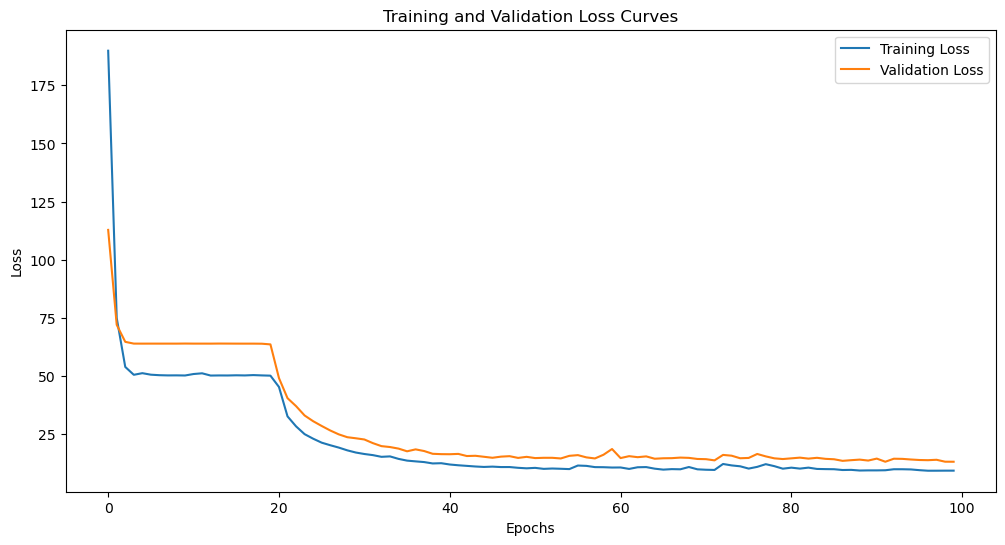

In [30]:
import matplotlib.pyplot as plt

# Plot the training and validation loss curves
plt.figure(figsize=(12, 6))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Curves')
plt.legend()
plt.show()


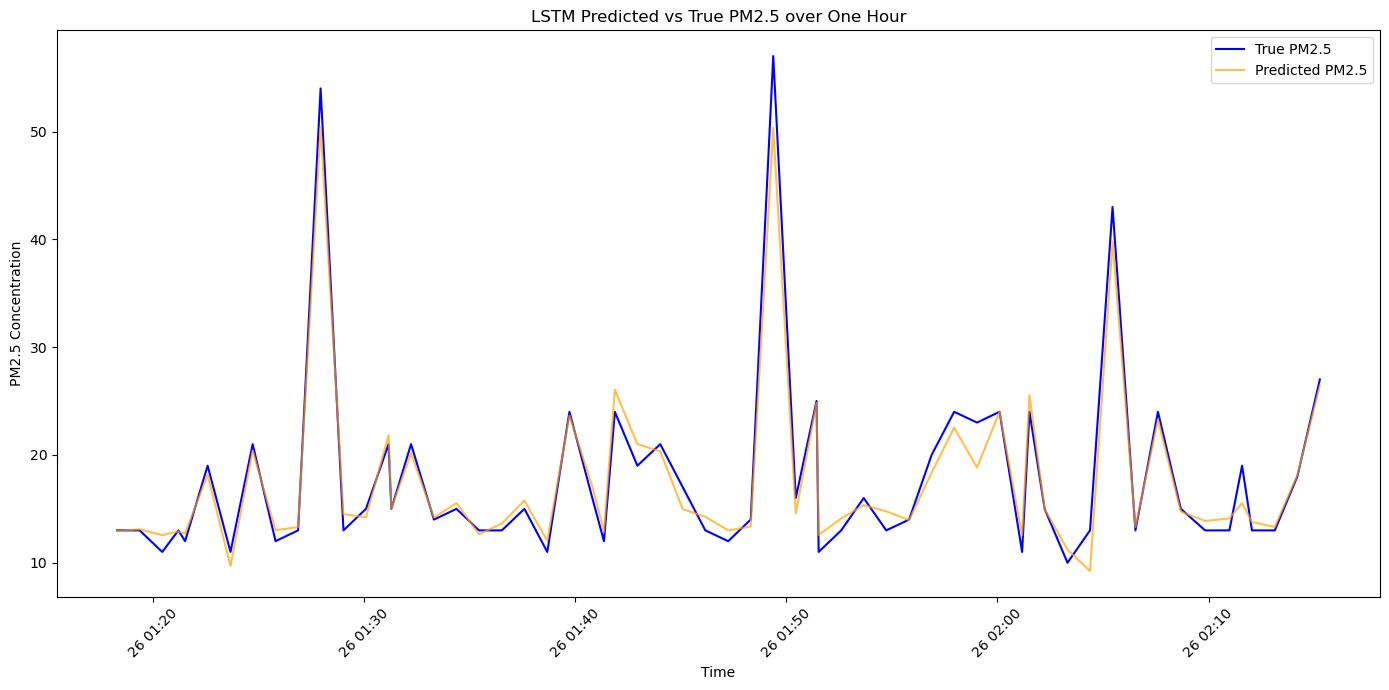

In [31]:
import matplotlib.pyplot as plt

# Assuming your DataFrame contains a 'datetime' column
time_values = pd.to_datetime(df1['datetime'])

# Assuming your data is sampled at a consistent frequency (e.g., every minute),
# you need to choose the indices for a one-hour period. If your data is collected
# every minute, there should be 60 data points for one hour.

# Given your task of predicting PM2.5 values and comparing them to the 
# true values, using the actual datetime column from your dataset (Method 2) is more suitable. 
# This method will: Ensure that the x-axis aligns with the actual time points in your dataset.
# Provide a more accurate representation of how well your model performs over time, especially if 
# there are any irregularities or gaps in the time intervals.

# Choose the starting index for the one-hour period
start_index = 0  # Change this to any index where you want to start
end_index = start_index + 60 # Assuming 60 data points represent one hour

# Slice the data for the specified range
time_values_subset = time_values[start_index:end_index]
actuals_subset = actuals[start_index:end_index]
predictions_subset = predictions[start_index:end_index]

# Plotting the subset
plt.figure(figsize=(14, 7))
plt.plot(time_values_subset, actuals_subset, label='True PM2.5', color='blue')
plt.plot(time_values_subset, predictions_subset, label='Predicted PM2.5', color='orange', alpha=0.7)
plt.xlabel('Time')
plt.ylabel('PM2.5 Concentration')
plt.title('LSTM Predicted vs True PM2.5 over One Hour')
plt.legend()
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


# DATA PREPARATION FOR DNN MODEL

In [32]:
import torch
from torch.utils.data import TensorDataset

# Reshape X_tensor for DNN
# Original shape: (4227, 60, 16), flatten it to (4227, 960)
X_tensor_flat = X_tensor.view(X_tensor.size(0), -1)  # Flatten time steps and features

# y_tensor remains the same shape: (4227, 1)

# Create a new TensorDataset for DNN
dnn_dataset = TensorDataset(X_tensor_flat, y_tensor)

# Check the shapes
print("X_tensor_flat.shape:", X_tensor_flat.shape)  # Should be (4227, 960)
print("y_tensor.shape:", y_tensor.shape)  # Should be (4227, 1)


X_tensor_flat.shape: torch.Size([4227, 1080])
y_tensor.shape: torch.Size([4227, 1])


In [33]:
# # Split the dataset into training (70%), validation (10%), and testing (20%) sets
# dnn_train_size = int(0.7 * len(dnn_dataset))
# dnn_val_size = int(0.1 * len(dnn_dataset))
# dnn_test_size = len(dnn_dataset) - dnn_train_size - dnn_val_size

# # Perform the split
# dnn_train_dataset, dnn_al_dataset, dnn_test_dataset = random_split(dnn_dataset, [dnn_train_size, dnn_val_size, dnn_test_size])

# # Create DataLoaders for training, validation, and testing
# dnn_train_loader = DataLoader(dnn_train_dataset, batch_size=32, shuffle=True)
# dnn_val_loader = DataLoader(dnn_val_size, batch_size=32, shuffle=False)
# dnn_test_loader = DataLoader(dnn_test_dataset, batch_size=32, shuffle=False)

In [34]:
# Check the dataset type
print(type(dnn_dataset))  # Should be <class 'torch.utils.data.dataset.TensorDataset'>

<class 'torch.utils.data.dataset.TensorDataset'>


In [35]:
dnn_train_size = int(0.7 * len(dnn_dataset))
dnn_val_size = int(0.1 * len(dnn_dataset))
dnn_test_size = len(dnn_dataset) - dnn_train_size - dnn_val_size

# Perform the split
dnn_train_dataset, dnn_val_dataset, dnn_test_dataset = random_split(dnn_dataset, [dnn_train_size, dnn_val_size, dnn_test_size])

# Check the splits
print(f"Train size: {len(dnn_train_dataset)}, Val size: {len(dnn_val_dataset)}, Test size: {len(dnn_test_dataset)}")


Train size: 2958, Val size: 422, Test size: 847


In [36]:
# Create DataLoaders for training, validation, and testing
dnn_train_loader = DataLoader(dnn_train_dataset, batch_size=32, shuffle=True)
dnn_val_loader = DataLoader(dnn_val_dataset, batch_size=32, shuffle=False)
dnn_test_loader = DataLoader(dnn_test_dataset, batch_size=32, shuffle=False)

# Check the DataLoader objects
print(f"DataLoader train batches: {len(dnn_train_loader)}, val batches: {len(dnn_val_loader)}, test batches: {len(dnn_test_loader)}")


DataLoader train batches: 93, val batches: 14, test batches: 27


# DNN MODEL

In [37]:
import torch.optim as optim
import torch.nn as nn

# Define the DNN model again (if not already defined)
class DNNModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(DNNModel, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, hidden_size // 2)
        self.fc3 = nn.Linear(hidden_size // 2, output_size)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        out = self.relu(out)
        out = self.fc3(out)
        return out


In [38]:

# Hyperparameters
input_size = X_tensor_flat.shape[1]  # This should be 960 (60 time steps * 16 features)
hidden_size = 128
output_size = 1  # Predicting a single value (PM2.5)
num_epochs = 100
learning_rate = 0.001

# Initialize the model, loss function, and optimizer
dnn_model = DNNModel(input_size, hidden_size, output_size)
criterion = nn.MSELoss()  # Mean Squared Error for regression
optimizer = optim.Adam(dnn_model.parameters(), lr=learning_rate)

# Training function
def dnn_train_model(model, optimizer, train_loader, val_loader, num_epochs):
    model.train()  # Set model to training mode
    train_losses = []
    val_losses = []

    for epoch in range(num_epochs):
        running_loss = 0.0
        for X_batch, y_batch in train_loader:  # Iterate over batches from the DataLoader
            # Forward pass
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)

            # Backward and optimize
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            # Accumulate training loss
            running_loss += loss.item()

        # Calculate average training loss for the epoch
        avg_train_loss = running_loss / len(train_loader)
        train_losses.append(avg_train_loss)

        # Validation phase
        model.eval()  # Set model to evaluation mode
        val_loss = 0.0
        with torch.no_grad():  # Disable gradient calculation for validation
            for X_val, y_val in val_loader:
                val_outputs = model(X_val)
                val_loss += criterion(val_outputs, y_val).item()

        # Calculate average validation loss for the epoch
        avg_val_loss = val_loss / len(val_loader)
        val_losses.append(avg_val_loss)

        # Print training and validation loss for the epoch
        print(f'Epoch [{epoch + 1}/{num_epochs}], Training Loss: {avg_train_loss:.4f}, Validation Loss: {avg_val_loss:.4f}')

        # Switch back to training mode
        model.train()

    return train_losses, val_losses



In [39]:
# Train the DNN model
dnn_train_losses, dnn_val_losses = dnn_train_model(dnn_model, optimizer, dnn_train_loader, dnn_val_loader, num_epochs)


Epoch [1/100], Training Loss: 67.8676, Validation Loss: 33.0003
Epoch [2/100], Training Loss: 21.0012, Validation Loss: 27.8864
Epoch [3/100], Training Loss: 16.9463, Validation Loss: 24.7997
Epoch [4/100], Training Loss: 15.5744, Validation Loss: 23.6114
Epoch [5/100], Training Loss: 14.1903, Validation Loss: 22.6329
Epoch [6/100], Training Loss: 12.9184, Validation Loss: 23.2056
Epoch [7/100], Training Loss: 12.8162, Validation Loss: 21.9086
Epoch [8/100], Training Loss: 12.4712, Validation Loss: 21.7731
Epoch [9/100], Training Loss: 12.0918, Validation Loss: 21.5913
Epoch [10/100], Training Loss: 11.7446, Validation Loss: 21.8057
Epoch [11/100], Training Loss: 11.6456, Validation Loss: 21.3947
Epoch [12/100], Training Loss: 11.7189, Validation Loss: 22.4887
Epoch [13/100], Training Loss: 11.5619, Validation Loss: 21.0016
Epoch [14/100], Training Loss: 11.2179, Validation Loss: 21.0180
Epoch [15/100], Training Loss: 11.4076, Validation Loss: 21.8259
Epoch [16/100], Training Loss: 11.

In [46]:
import os

# Define the directory to save your models
save_dir = 'D:/PYTORCH_models/ALL FEATURES/DNN'

# Create the directory if it doesn't exist
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

# Get the highest model number from the existing files
model_files = [f for f in os.listdir(save_dir) if f.startswith('model_')]
if model_files:
    # Extract the highest number from the existing file names
    latest_model_number = max([int(f.split('_')[1].split('.')[0]) for f in model_files])
else:
    latest_model_number = 0

# Increment for the new file
new_model_number = latest_model_number + 1

# Save the model weights and architecture with incremented filenames
torch.save(dnn_model.state_dict(), os.path.join(save_dir, f'weights_{new_model_number}.pth'))
torch.save(dnn_model, os.path.join(save_dir, f'model_{new_model_number}.pth'))

print(f"Model saved as model_{new_model_number}.pth and weights_{new_model_number}.pth")



Model saved as model_2.pth and weights_2.pth


In [41]:
import torch
import numpy as np

def evaluate_model_dnn(model, test_loader):
    model.eval()  # Set the model to evaluation mode
    mse_loss = 0.0
    num_samples = 0
    predictions = []
    actuals = []

    with torch.no_grad():  # Disable gradient calculation for evaluation
        for X_batch, y_batch in test_loader:
            # Forward pass
            outputs = model(X_batch)
            # Compute MSE loss for the batch
            loss = criterion(outputs, y_batch)
            mse_loss += loss.item() * X_batch.size(0)  # Accumulate loss
            num_samples += X_batch.size(0)

            # Store predictions and actual values for further analysis
            predictions.append(outputs.cpu().numpy())  # Make sure it's on the CPU for numpy
            actuals.append(y_batch.cpu().numpy())  # Make sure it's on the CPU for numpy

    # Compute the average MSE across all samples
    mse_loss /= num_samples
    # Compute the RMSE
    rmse = np.sqrt(mse_loss)

    # Print out the results
    print(f"Test MSE: {mse_loss:.4f}")
    print(f"Test RMSE: {rmse:.4f}")
    
    # Convert predictions and actuals to numpy arrays for further analysis or visualization
    predictions = np.concatenate(predictions)
    actuals = np.concatenate(actuals)

    return predictions, actuals

# Usage Example
predictions_dnn, actuals_dnn = evaluate_model_dnn(dnn_model, dnn_test_loader)


Test MSE: 18.2806
Test RMSE: 4.2756


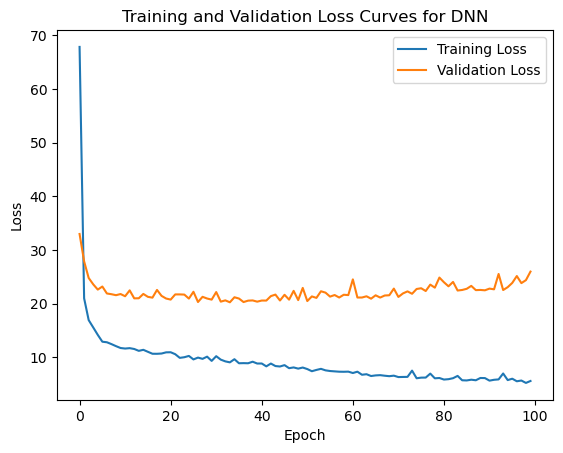

In [42]:

# Plotting the losses after training
import matplotlib.pyplot as plt

plt.plot(dnn_train_losses, label='Training Loss')
plt.plot(dnn_val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Curves for DNN')
plt.legend()
plt.show()

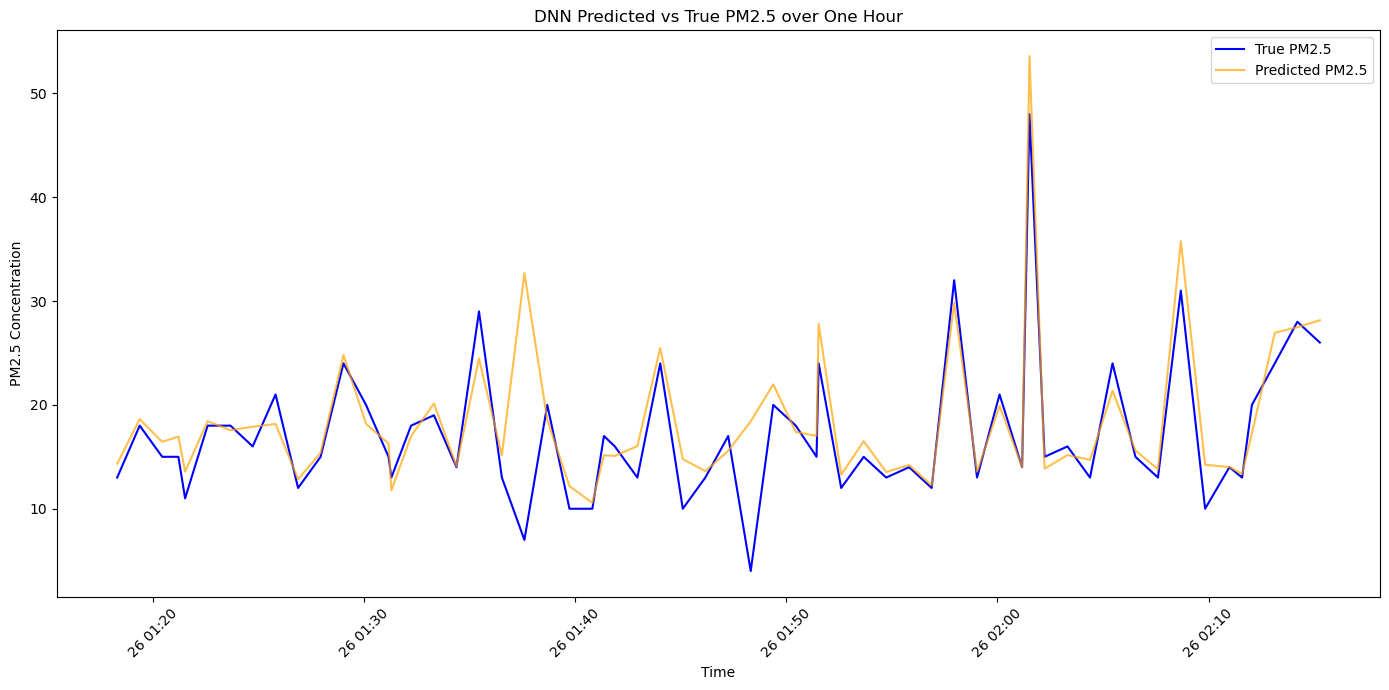

In [49]:
# Assuming your DataFrame contains a 'datetime' column
# time_values = pd.to_datetime(df['datetime'])
# Assuming your DataFrame contains a 'datetime' column
time_values = pd.to_datetime(df1['datetime'])

# For a one-hour window (60 data points)
start_index = 0  # Choose the starting point
end_index = start_index + 60  # Assuming 60 data points represent one hour

# Extract a subset of time values corresponding to that range
time_values_subset = time_values[start_index:end_index]

# Also extract the corresponding actual and predicted values
actuals_subset = actuals_dnn[start_index:end_index]
predictions_subset = predictions_dnn[start_index:end_index]

# Now you can plot them as shown previously
plt.figure(figsize=(14, 7))
plt.plot(time_values_subset, actuals_subset, label='True PM2.5', color='blue')
plt.plot(time_values_subset, predictions_subset, label='Predicted PM2.5', color='orange', alpha=0.7)
plt.xlabel('Time')
plt.ylabel('PM2.5 Concentration')
plt.title('DNN Predicted vs True PM2.5 over One Hour')
plt.legend()
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()
